# FINAL MAIN WITH AGENTS FROM 1 TO 6

## IMPORTS

In [11]:
import gymnasium as gym
import torch
from utils import *
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## COMMON PARAMETERS

In [12]:
# HYPERPARAMETERS
# environment hyperparams
n_steps = 5000 # total credit to train the agent
n_eval_runs = 10 # how many evaluation runs to do each 20k steps 

# Aggregate parameters
n_seeds = 3 # number of random seeds for the aggregation of plots
agents_seeds = [10, 42, 81] # Arbitrary seeds for the agents

# agent hyperparams
gamma = 0.99  # discount factor
ent_coef = 0.01  # coefficient for the entropy bonus (to encourage exploration)
actor_lr = 1e-5
critic_lr = 1e-3
stochastic_reward_probability = 0.9
# Note: the actor has a slower learning rate so that the value targets become
# more stationary and are theirfore easier to estimate for the critic

# DEVICE
device = torch.device("cpu")


## DISCRETE CASE 1-4

In [13]:
# use CartPole for the discrete case
environment = "CartPole-v1"
env_eval = gym.make(environment)
obs_shape = env_eval.observation_space.shape[0]
action_space_dims = env_eval.action_space.n
bool_discrete = True
agents_data_discrete = {}  # Creating the dictionary to store the data of the agents 1->4

### AGENT 1.A (K = 1 | n = 1) DETERMINISTIC

#### HYPERPARAMETERS SETUP

In [14]:
id_agent = "1A" # ID of the Agent for the report [1:6]
n_envs_1a = 1
envs = []
for i in range(n_envs_1a):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_1a = 1
n_updates = n_steps // (n_steps_per_update_1a * n_envs_1a)
evaluation_interval = 20000//(n_steps_per_update_1a * n_envs_1a) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
logging_interval = 1000//(n_steps_per_update_1a * n_envs_1a)
stochasticity_bool = False

#### TRAINING AGENT

In [15]:
# Logging training variables
values_1a, critic_losses_1a, actor_losses_1a, entropies_1a, evaluation_returns_seeds_1a, training_returns_1a, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_1a, n_steps_per_update_1a, evaluation_interval,logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)

train_returns_idx_1a = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_discrete.update(create_agent_data('agent_1a', values_1a, critic_losses_1a, actor_losses_1a, entropies_1a, evaluation_returns_seeds_1a, agents_seeds, n_steps, stochasticity_bool, n_envs_1a, n_steps_per_update_1a, train_returns_idx_1a, training_returns_1a))
save_agents_data(agents_data_discrete, 'agents_data_discrete.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 4/5001 [00:00<02:06, 39.36it/s]

EVALUATION


100%|██████████| 5001/5001 [00:18<00:00, 277.14it/s]


Running seed 42 for agent 1


  0%|          | 1/5001 [00:00<08:47,  9.48it/s]

EVALUATION


100%|██████████| 5001/5001 [00:16<00:00, 299.15it/s]


Running seed 81 for agent 2


  0%|          | 1/5001 [00:00<08:51,  9.41it/s]

EVALUATION


100%|██████████| 5001/5001 [00:17<00:00, 290.19it/s]


#### PLOTTING

Actor loss y min shape (6,)
Actor loss y max shape (6,)
Actor loss y avg shape (6,)
actor_y_avg [ 0.6956527   1.28409167 -0.12557938 -0.38592086 -1.16442704  1.11710376]


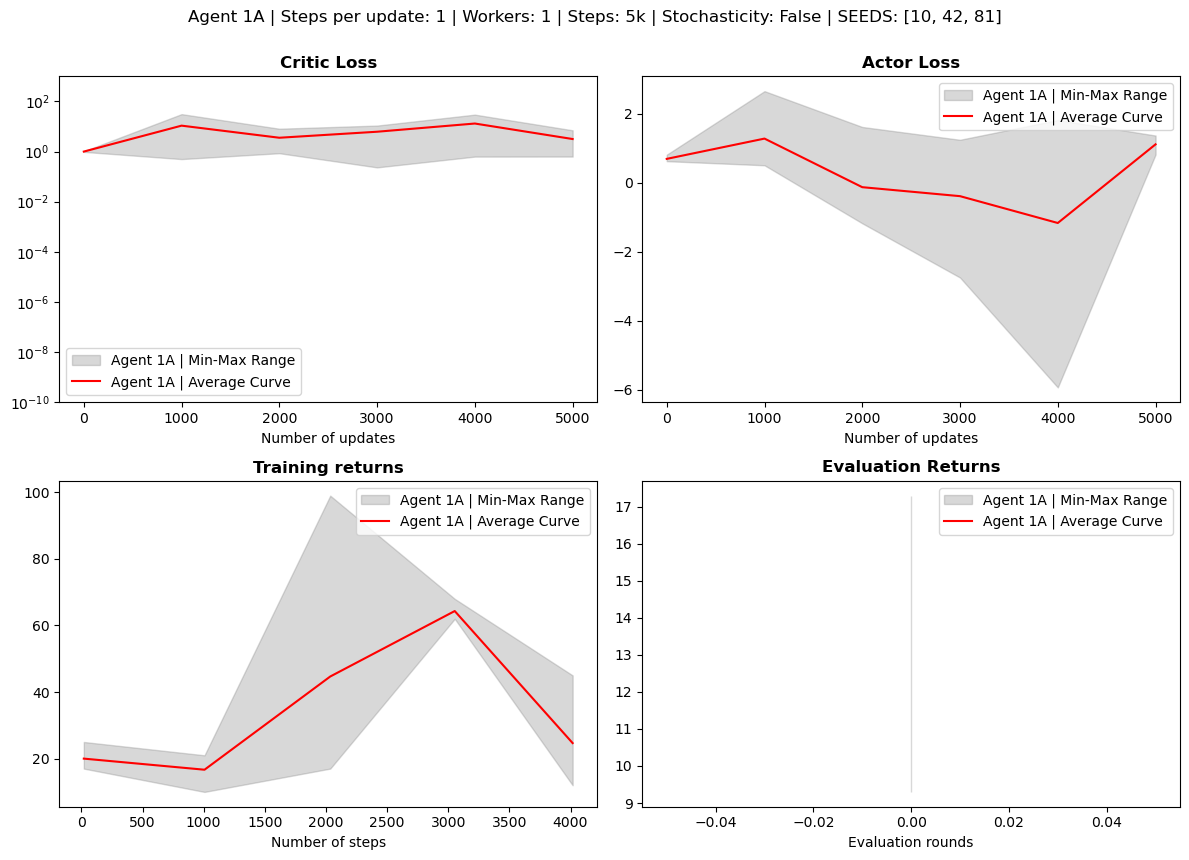

IndexError: tuple index out of range

<Figure size 1000x600 with 0 Axes>

In [16]:
# Define the directory path
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-10, 1e3]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_1a, actor_losses_1a, train_returns_idx_1a, training_returns_1a, evaluation_returns_seeds_1a, agents_seeds, id_agent, n_steps_per_update_1a, n_envs_1a, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_1a} | Workers: {n_envs_1a} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_1a, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_1a} | Workers: {n_envs_1a} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

### AGENT 1.B (K = 1 | n = 1) STOCHASTIC

#### HYPERPARAMETERS SETUP

In [8]:
id_agent = "1B" # ID of the Agent for the report [1:6]
n_envs_1b = 1
envs = []
for i in range(n_envs_1b):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_1b = 1
n_updates = n_steps // (n_steps_per_update_1b*n_envs_1b)
evaluation_interval = 20000//(n_steps_per_update_1b*n_envs_1b) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
stochasticity_bool = True
#agents_data_discrete = load_agents_data("agents_data_discrete.npz") # Load the data of the previous agents

#### TRAIN AGENT

In [9]:
# Logging training variables
values_1b, critic_losses_1b, actor_losses_1b, entropies_1b, evaluation_returns_seeds_1b, training_returns_1b, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_1b, n_steps_per_update_1b, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)

train_returns_idx_1b = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_discrete.update(create_agent_data('agent_1b', values_1b, critic_losses_1b, actor_losses_1b, entropies_1b, evaluation_returns_seeds_1b, agents_seeds, n_steps, stochasticity_bool, n_envs_1b, n_steps_per_update_1b, train_returns_idx_1b, training_returns_1b))
save_agents_data(agents_data_discrete, 'agents_data_discrete.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 0/500001 [00:00<?, ?it/s]/Users/alexis/anaconda3/envs/rl_project/lib/python3.9/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
  0%|          | 87/500001 [00:00<09:36, 867.12it/s]

EVALUATION


  4%|▍         | 20017/500001 [00:16<09:28, 843.75it/s] 

EVALUATION


  8%|▊         | 39870/500001 [00:31<05:48, 1318.52it/s]

EVALUATION


 12%|█▏        | 59984/500001 [00:47<05:47, 1265.42it/s]

EVALUATION


 16%|█▌        | 79894/500001 [01:03<05:31, 1269.11it/s]

EVALUATION


 20%|█▉        | 99937/500001 [01:19<04:48, 1386.39it/s]

EVALUATION


 24%|██▍       | 119948/500001 [01:33<04:37, 1369.86it/s]

EVALUATION


 28%|██▊       | 140087/500001 [01:48<05:49, 1028.96it/s]

EVALUATION


 32%|███▏      | 159963/500001 [02:03<04:10, 1356.57it/s]

EVALUATION


 36%|███▌      | 179916/500001 [02:18<04:08, 1286.74it/s]

EVALUATION


 40%|███▉      | 199942/500001 [02:34<03:36, 1382.99it/s]

EVALUATION


 44%|████▍     | 219872/500001 [02:48<03:14, 1439.94it/s]

EVALUATION


 48%|████▊     | 240007/500001 [03:04<04:39, 931.36it/s] 

EVALUATION


 52%|█████▏    | 259991/500001 [03:19<03:18, 1208.00it/s]

EVALUATION


 56%|█████▌    | 279938/500001 [03:35<02:49, 1301.57it/s]

EVALUATION


 60%|█████▉    | 299897/500001 [03:51<02:25, 1373.69it/s]

EVALUATION


 64%|██████▍   | 319937/500001 [04:07<02:14, 1340.08it/s]

EVALUATION


 68%|██████▊   | 339974/500001 [04:22<02:00, 1330.56it/s]

EVALUATION


 72%|███████▏  | 359917/500001 [04:37<01:36, 1449.88it/s]

EVALUATION


 76%|███████▌  | 379989/500001 [04:53<01:26, 1385.41it/s]

EVALUATION


 80%|████████  | 400004/500001 [05:08<01:41, 981.22it/s] 

EVALUATION


 84%|████████▍ | 419983/500001 [05:23<00:59, 1343.02it/s]

EVALUATION


 88%|████████▊ | 440077/500001 [05:39<01:07, 892.91it/s] 

EVALUATION


 92%|█████████▏| 459957/500001 [05:55<00:32, 1234.69it/s]

EVALUATION


 96%|█████████▌| 479890/500001 [06:10<00:14, 1361.61it/s]

EVALUATION


100%|█████████▉| 499881/500001 [06:27<00:00, 1283.73it/s]

EVALUATION


100%|██████████| 500001/500001 [06:27<00:00, 1289.75it/s]


Running seed 42 for agent 1


  0%|          | 77/500001 [00:00<10:50, 768.33it/s]

EVALUATION


  4%|▍         | 19866/500001 [00:14<05:41, 1404.95it/s]

EVALUATION


  8%|▊         | 39889/500001 [00:29<05:29, 1395.37it/s]

EVALUATION


 12%|█▏        | 59998/500001 [00:44<06:02, 1215.44it/s]

EVALUATION


 16%|█▌        | 79874/500001 [01:01<05:35, 1250.47it/s]

EVALUATION


 20%|██        | 100004/500001 [01:17<07:06, 936.98it/s]

EVALUATION


 24%|██▍       | 119970/500001 [01:32<04:35, 1380.03it/s]

EVALUATION


 28%|██▊       | 139879/500001 [01:47<04:36, 1304.60it/s]

EVALUATION


 32%|███▏      | 159965/500001 [02:02<04:10, 1357.32it/s]

EVALUATION


 36%|███▌      | 179914/500001 [02:17<03:56, 1355.27it/s]

EVALUATION


 40%|███▉      | 199977/500001 [02:33<03:38, 1375.60it/s]

EVALUATION


 44%|████▍     | 219942/500001 [02:48<03:38, 1282.96it/s]

EVALUATION


 48%|████▊     | 239896/500001 [03:03<03:10, 1368.06it/s]

EVALUATION


 52%|█████▏    | 259963/500001 [03:19<03:37, 1106.08it/s]

EVALUATION


 56%|█████▌    | 279875/500001 [03:36<02:40, 1371.72it/s]

EVALUATION


 60%|█████▉    | 299927/500001 [03:51<02:27, 1353.31it/s]

EVALUATION


 64%|██████▍   | 319951/500001 [04:06<02:12, 1359.70it/s]

EVALUATION


 68%|██████▊   | 340116/500001 [04:22<02:35, 1031.51it/s]

EVALUATION


 72%|███████▏  | 359998/500001 [04:36<01:40, 1390.83it/s]

EVALUATION


 76%|███████▌  | 379928/500001 [04:51<01:25, 1396.30it/s]

EVALUATION


 80%|███████▉  | 399993/500001 [05:05<01:16, 1305.60it/s]

EVALUATION


 84%|████████▍ | 419954/500001 [05:21<01:04, 1238.88it/s]

EVALUATION


 88%|████████▊ | 439981/500001 [05:36<00:42, 1400.41it/s]

EVALUATION


 92%|█████████▏| 459952/500001 [05:51<00:28, 1396.26it/s]

EVALUATION


 96%|█████████▌| 479965/500001 [06:06<00:14, 1390.74it/s]

EVALUATION


100%|█████████▉| 499965/500001 [06:20<00:00, 1386.62it/s]

EVALUATION


100%|██████████| 500001/500001 [06:21<00:00, 1311.12it/s]


Running seed 81 for agent 2


  0%|          | 88/500001 [00:00<09:29, 877.13it/s]

EVALUATION


  4%|▍         | 19973/500001 [00:14<05:48, 1379.30it/s]

EVALUATION


  8%|▊         | 39949/500001 [00:28<05:31, 1386.53it/s]

EVALUATION


 12%|█▏        | 59927/500001 [00:43<05:18, 1381.86it/s]

EVALUATION


 16%|█▌        | 79976/500001 [00:58<04:57, 1412.91it/s]

EVALUATION


 20%|█▉        | 99903/500001 [01:13<04:40, 1425.02it/s]

EVALUATION


 24%|██▍       | 119953/500001 [01:28<04:26, 1423.85it/s]

EVALUATION


 28%|██▊       | 139959/500001 [01:42<04:14, 1413.37it/s]

EVALUATION


 32%|███▏      | 159860/500001 [01:57<03:59, 1422.55it/s]

EVALUATION


 36%|███▌      | 179925/500001 [02:11<03:44, 1424.47it/s]

EVALUATION


 40%|███▉      | 199958/500001 [02:26<03:32, 1410.04it/s]

EVALUATION


 44%|████▍     | 219890/500001 [02:41<03:20, 1393.66it/s]

EVALUATION


 48%|████▊     | 239957/500001 [02:56<03:06, 1395.71it/s]

EVALUATION


 52%|█████▏    | 259918/500001 [03:10<02:52, 1392.33it/s]

EVALUATION


 56%|█████▌    | 279998/500001 [03:25<02:40, 1372.44it/s]

EVALUATION


 60%|█████▉    | 299902/500001 [03:40<02:24, 1389.09it/s]

EVALUATION


 64%|██████▍   | 319944/500001 [03:55<02:08, 1403.29it/s]

EVALUATION


 68%|██████▊   | 339888/500001 [04:10<01:57, 1357.44it/s]

EVALUATION


 72%|███████▏  | 359916/500001 [04:26<01:56, 1205.13it/s]

EVALUATION


 76%|███████▌  | 379958/500001 [04:42<01:27, 1372.98it/s]

EVALUATION


 80%|███████▉  | 399999/500001 [05:01<01:23, 1198.34it/s]

EVALUATION


 84%|████████▍ | 419948/500001 [05:17<01:02, 1282.10it/s]

EVALUATION


 88%|████████▊ | 439879/500001 [05:33<00:46, 1289.93it/s]

EVALUATION


 92%|█████████▏| 459944/500001 [05:48<00:29, 1350.45it/s]

EVALUATION


 96%|█████████▌| 479934/500001 [06:03<00:14, 1383.33it/s]

EVALUATION


100%|█████████▉| 499878/500001 [06:19<00:00, 1297.31it/s]

EVALUATION


100%|██████████| 500001/500001 [06:19<00:00, 1316.27it/s]


#### PLOTTING

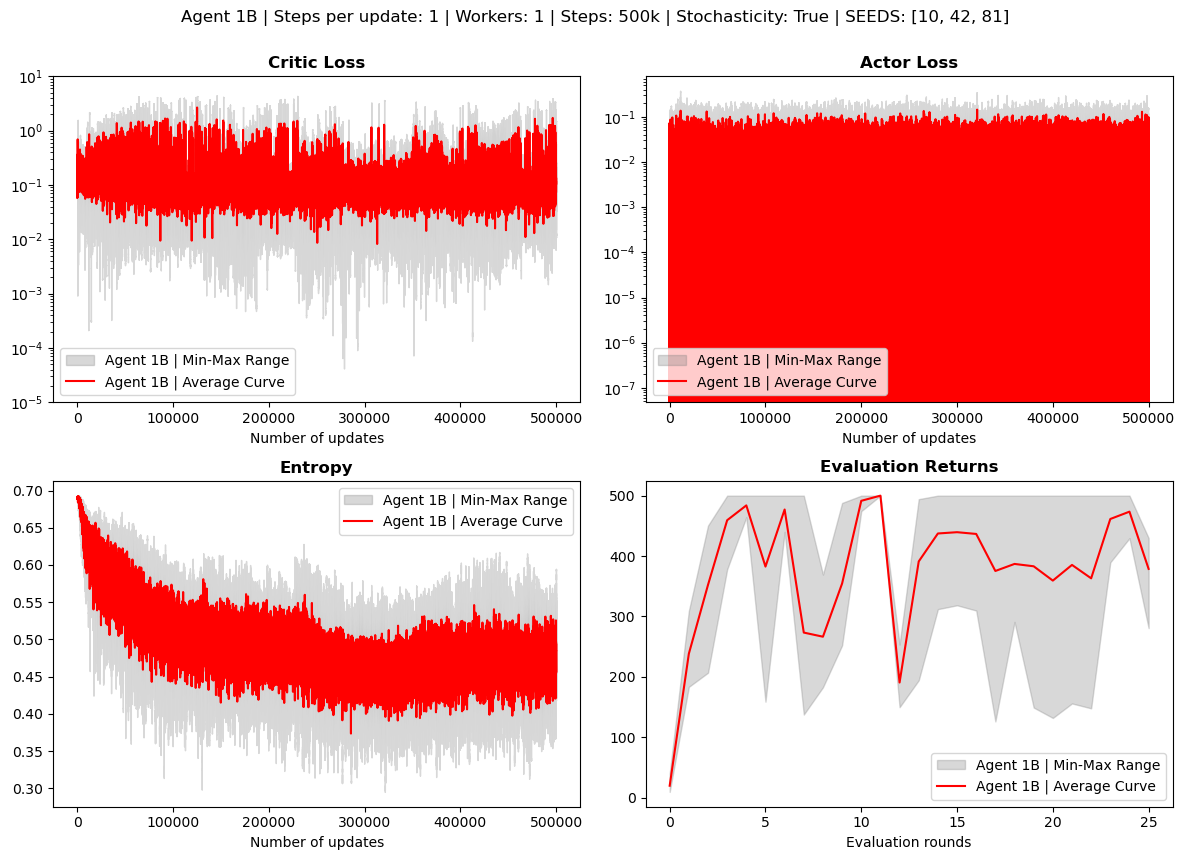

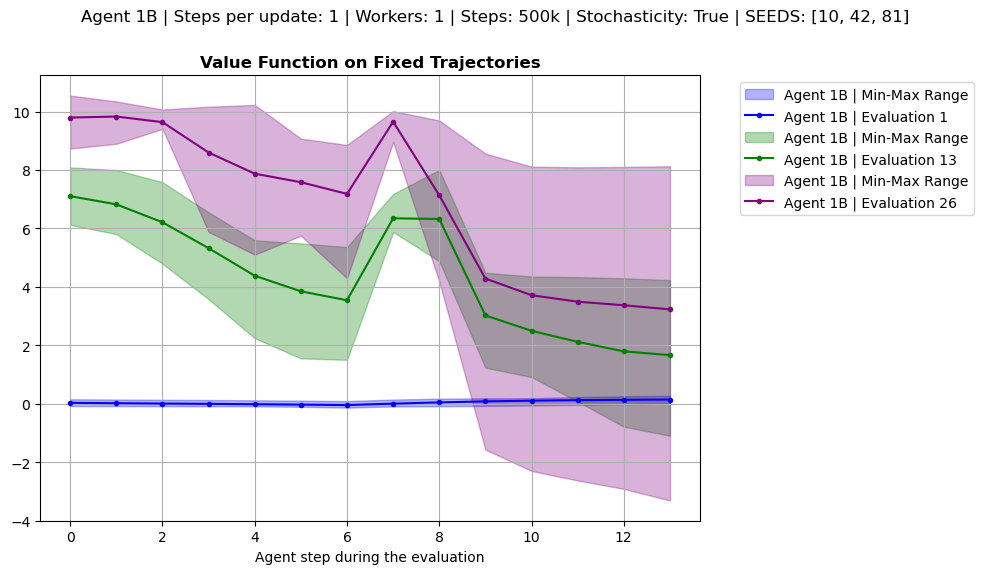

In [10]:
# Define the directory path
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_1b, actor_losses_1b, train_returns_idx_1b, training_returns_1b, evaluation_returns_seeds_1b, agents_seeds, id_agent, n_steps_per_update_1b, n_envs_1b, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_1b} | Workers: {n_envs_1b} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_1b, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_1b} | Workers: {n_envs_1b} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

### AGENT 2 (K = 6 | n = 1)

#### HYPERPARAMETERS SETUP

In [11]:
id_agent = "2" # ID of the Agent for the report [1:6]
n_envs_2 = 6
envs = []
for i in range(n_envs_2):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_2 = 1
n_updates = n_steps // (n_steps_per_update_2*n_envs_2)
evaluation_interval = 20000//(n_steps_per_update_2*n_envs_2) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
logging_interval = 1000//(n_steps_per_update_2 * n_envs_2)
stochasticity_bool = True
#agents_data_discrete = load_agents_data("agents_data_discrete.npz") # Load the data of the previous agents

#### TRAIN AGENT

In [12]:
# Logging training variables
values_2, critic_losses_2, actor_losses_2, entropies_2, evaluation_returns_seeds_2, training_returns_2, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_2, n_steps_per_update_2, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)

train_returns_idx_2 = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_discrete.update(create_agent_data('agent_2', values_2, critic_losses_2, actor_losses_2, entropies_2, evaluation_returns_seeds_2, agents_seeds, n_steps, stochasticity_bool, n_envs_2, n_steps_per_update_2, train_returns_idx_2, training_returns_2))
save_agents_data(agents_data_discrete, 'agents_data_discrete.npz') # Saving the data of the agents


Running seed 10 for agent 0


  0%|          | 31/83334 [00:00<04:35, 302.69it/s]

EVALUATION


  4%|▍         | 3401/83334 [00:08<03:20, 399.14it/s]

EVALUATION


  8%|▊         | 6699/83334 [00:16<03:21, 379.81it/s]

EVALUATION


 12%|█▏        | 10058/83334 [00:24<03:14, 377.30it/s]

EVALUATION


 16%|█▌        | 13360/83334 [00:33<03:14, 360.49it/s]

EVALUATION


 20%|██        | 16709/83334 [00:41<03:05, 359.94it/s]

EVALUATION


 24%|██▍       | 20041/83334 [00:49<02:55, 361.41it/s]

EVALUATION


 28%|██▊       | 23363/83334 [00:58<03:03, 326.43it/s]

EVALUATION


 32%|███▏      | 26709/83334 [01:06<02:47, 337.54it/s]

EVALUATION


 36%|███▌      | 29995/83334 [01:15<02:11, 405.64it/s]

EVALUATION


 40%|████      | 33374/83334 [01:23<02:20, 354.97it/s]

EVALUATION


 44%|████▍     | 36675/83334 [01:31<02:23, 325.90it/s]

EVALUATION


 48%|████▊     | 40011/83334 [01:40<02:09, 333.92it/s]

EVALUATION


 52%|█████▏    | 43352/83334 [01:48<01:56, 343.41it/s]

EVALUATION


 56%|█████▌    | 46660/83334 [01:56<01:30, 403.13it/s]

EVALUATION


 60%|█████▉    | 49971/83334 [02:05<01:23, 399.20it/s]

EVALUATION


 64%|██████▍   | 53332/83334 [02:13<01:45, 283.08it/s]

EVALUATION


 68%|██████▊   | 56637/83334 [02:21<01:03, 422.94it/s]

EVALUATION


 72%|███████▏  | 59960/83334 [02:29<00:55, 418.47it/s]

EVALUATION


 76%|███████▌  | 63288/83334 [02:38<00:49, 408.46it/s]

EVALUATION


 80%|███████▉  | 66627/83334 [02:46<00:40, 413.12it/s]

EVALUATION


 84%|████████▍ | 69967/83334 [02:54<00:31, 419.33it/s]

EVALUATION


 88%|████████▊ | 73318/83334 [03:03<00:23, 422.72it/s]

EVALUATION


 92%|█████████▏| 76652/83334 [03:11<00:15, 418.96it/s]

EVALUATION


 96%|█████████▌| 79980/83334 [03:19<00:07, 422.65it/s]

EVALUATION


100%|█████████▉| 83312/83334 [03:28<00:00, 420.66it/s]

EVALUATION


100%|██████████| 83334/83334 [03:28<00:00, 399.61it/s]


Running seed 42 for agent 1


  0%|          | 37/83334 [00:00<03:47, 366.70it/s]

EVALUATION


  4%|▍         | 3399/83334 [00:08<03:19, 400.26it/s]

EVALUATION


  8%|▊         | 6695/83334 [00:16<03:34, 357.43it/s]

EVALUATION


 12%|█▏        | 10028/83334 [00:24<03:59, 306.61it/s]

EVALUATION


 16%|█▌        | 13336/83334 [00:32<03:58, 293.78it/s]

EVALUATION


 20%|█▉        | 16650/83334 [00:40<02:39, 418.58it/s]

EVALUATION


 24%|██▍       | 19996/83334 [00:48<02:33, 413.22it/s]

EVALUATION


 28%|██▊       | 23330/83334 [00:56<02:34, 389.59it/s]

EVALUATION


 32%|███▏      | 26656/83334 [01:05<02:16, 414.18it/s]

EVALUATION


 36%|███▌      | 29988/83334 [01:13<02:21, 377.69it/s]

EVALUATION


 40%|███▉      | 33320/83334 [01:22<01:59, 417.55it/s]

EVALUATION


 44%|████▍     | 36638/83334 [01:30<01:55, 406.03it/s]

EVALUATION


 48%|████▊     | 40003/83334 [01:39<02:35, 278.92it/s]

EVALUATION


 52%|█████▏    | 43288/83334 [01:47<01:37, 411.89it/s]

EVALUATION


 56%|█████▌    | 46649/83334 [01:55<01:28, 414.97it/s]

EVALUATION


 60%|█████▉    | 49982/83334 [02:04<01:19, 417.57it/s]

EVALUATION


 64%|██████▍   | 53312/83334 [02:12<01:12, 411.27it/s]

EVALUATION


 68%|██████▊   | 56638/83334 [02:20<01:04, 416.33it/s]

EVALUATION


 72%|███████▏  | 59987/83334 [02:29<00:56, 416.64it/s]

EVALUATION


 76%|███████▌  | 63315/83334 [02:37<00:47, 418.58it/s]

EVALUATION


 80%|███████▉  | 66645/83334 [02:46<00:39, 417.46it/s]

EVALUATION


 84%|████████▍ | 69975/83334 [02:54<00:32, 416.60it/s]

EVALUATION


 88%|████████▊ | 73308/83334 [03:03<00:24, 413.84it/s]

EVALUATION


 92%|█████████▏| 76656/83334 [03:11<00:16, 411.82it/s]

EVALUATION


 96%|█████████▌| 79960/83334 [03:20<00:08, 389.95it/s]

EVALUATION


100%|█████████▉| 83322/83334 [03:29<00:00, 418.71it/s]

EVALUATION


100%|██████████| 83334/83334 [03:30<00:00, 396.48it/s]


Running seed 81 for agent 2


  0%|          | 37/83334 [00:00<03:45, 369.30it/s]

EVALUATION


  4%|▍         | 3408/83334 [00:08<03:16, 406.71it/s]

EVALUATION


  8%|▊         | 6736/83334 [00:16<03:15, 392.66it/s]

EVALUATION


 12%|█▏        | 10038/83334 [00:24<03:32, 344.88it/s]

EVALUATION


 16%|█▌        | 13333/83334 [00:32<03:49, 304.81it/s]

EVALUATION


 20%|██        | 16680/83334 [00:40<03:23, 327.13it/s]

EVALUATION


 24%|██▍       | 20042/83334 [00:49<02:50, 371.82it/s]

EVALUATION


 28%|██▊       | 23351/83334 [00:57<03:05, 323.00it/s]

EVALUATION


 32%|███▏      | 26635/83334 [01:04<02:17, 413.49it/s]

EVALUATION


 36%|███▌      | 29992/83334 [01:13<02:08, 415.90it/s]

EVALUATION


 40%|███▉      | 33319/83334 [01:21<02:01, 410.63it/s]

EVALUATION


 44%|████▍     | 36624/83334 [01:29<01:51, 418.96it/s]

EVALUATION


 48%|████▊     | 39966/83334 [01:38<01:45, 412.92it/s]

EVALUATION


 52%|█████▏    | 43320/83334 [01:47<01:36, 413.43it/s]

EVALUATION


 56%|█████▌    | 46637/83334 [01:55<01:30, 407.34it/s]

EVALUATION


 60%|█████▉    | 49991/83334 [02:04<01:24, 393.94it/s]

EVALUATION


 64%|██████▍   | 53306/83334 [02:12<01:12, 414.40it/s]

EVALUATION


 68%|██████▊   | 56660/83334 [02:20<01:05, 407.62it/s]

EVALUATION


 72%|███████▏  | 59988/83334 [02:29<00:56, 416.09it/s]

EVALUATION


 76%|███████▌  | 63302/83334 [02:37<00:47, 419.30it/s]

EVALUATION


 80%|███████▉  | 66625/83334 [02:46<00:40, 414.74it/s]

EVALUATION


 84%|████████▍ | 69982/83334 [02:54<00:33, 396.08it/s]

EVALUATION


 88%|████████▊ | 73300/83334 [03:03<00:24, 416.52it/s]

EVALUATION


 92%|█████████▏| 76627/83334 [03:11<00:16, 412.27it/s]

EVALUATION


 96%|█████████▌| 79952/83334 [03:20<00:08, 418.38it/s]

EVALUATION


100%|█████████▉| 83325/83334 [03:29<00:00, 389.93it/s]

EVALUATION


100%|██████████| 83334/83334 [03:29<00:00, 397.70it/s]


#### PLOTTING

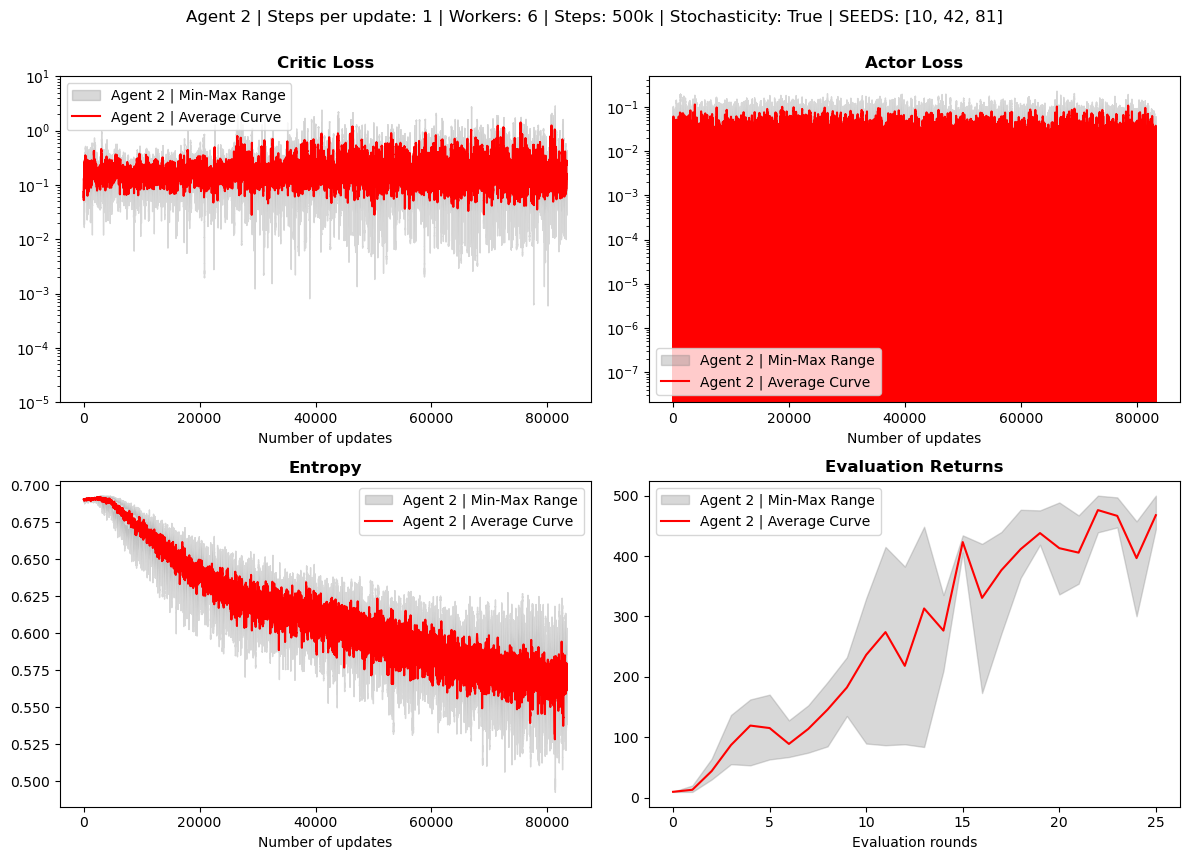

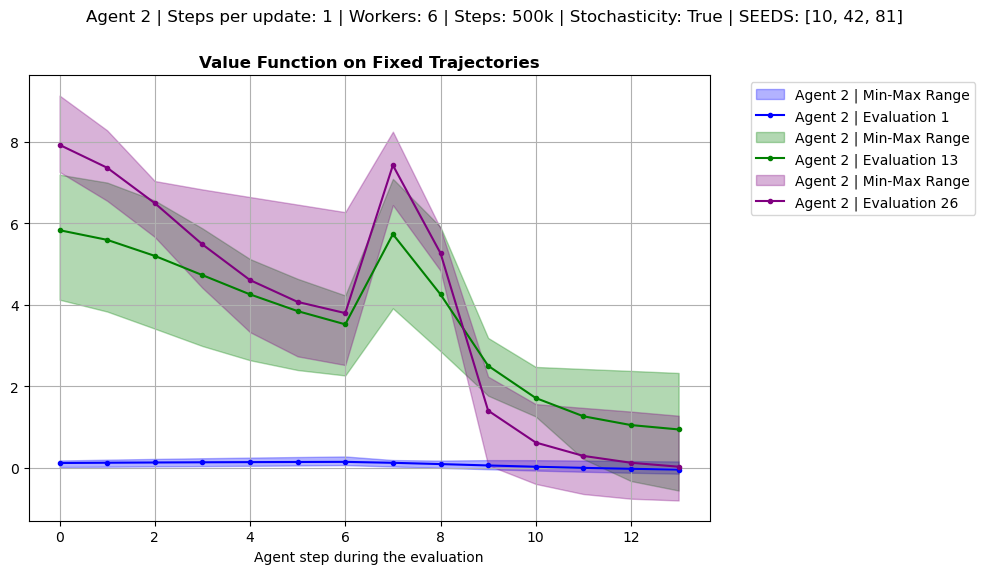

In [13]:
# Define the directory path
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_2, actor_losses_2, train_returns_idx_2, training_returns_2, evaluation_returns_seeds_2, agents_seeds, id_agent, n_steps_per_update_2, n_envs_2, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_2} | Workers: {n_envs_2} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_2, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_2} | Workers: {n_envs_2} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

### AGENT 3 (K = 1 | n = 6)

#### HYPERPARAMETERS SETUP

In [14]:
id_agent = "3" # ID of the Agent for the report [1:6]
n_envs_3 = 1
envs = []
for i in range(n_envs_3):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_3 = 6
n_updates = n_steps // (n_steps_per_update_3*n_envs_3)
evaluation_interval = 20000//(n_steps_per_update_3*n_envs_3) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
logging_interval = 1000//(n_steps_per_update_3 * n_envs_3)
stochasticity_bool = True
#agents_data_discrete = load_agents_data("agents_data_discrete.npz") # Load the data of the previous agents

#### TRAIN AGENT

In [15]:
# Logging training variables
values_3, critic_losses_3, actor_losses_3, entropies_3, evaluation_returns_seeds_3, training_returns_3, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_3, n_steps_per_update_3, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)

train_returns_idx_3 = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_discrete.update(create_agent_data('agent_3', values_3, critic_losses_3, actor_losses_3, entropies_3, evaluation_returns_seeds_3, agents_seeds, n_steps, stochasticity_bool, n_envs_3, n_steps_per_update_3, train_returns_idx_3, training_returns_3))
save_agents_data(agents_data_discrete, 'agents_data_discrete.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 35/83334 [00:00<04:01, 344.50it/s]

EVALUATION


  4%|▍         | 3332/83334 [00:07<02:54, 458.31it/s]

EVALUATION


  8%|▊         | 6650/83334 [00:14<02:45, 462.21it/s]

EVALUATION


 12%|█▏        | 9995/83334 [00:22<02:39, 458.91it/s]

EVALUATION


 16%|█▌        | 13311/83334 [00:29<02:30, 463.90it/s]

EVALUATION


 20%|█▉        | 16639/83334 [00:37<02:31, 441.39it/s]

EVALUATION


 24%|██▍       | 19981/83334 [00:45<02:18, 456.10it/s]

EVALUATION


 28%|██▊       | 23310/83334 [00:53<02:09, 465.20it/s]

EVALUATION


 32%|███▏      | 26649/83334 [01:01<02:11, 430.11it/s]

EVALUATION


 36%|███▌      | 29986/83334 [01:08<01:54, 464.46it/s]

EVALUATION


 40%|███▉      | 33289/83334 [01:16<01:49, 456.39it/s]

EVALUATION


 44%|████▍     | 36633/83334 [01:24<01:50, 423.66it/s]

EVALUATION


 48%|████▊     | 39993/83334 [01:32<01:42, 423.60it/s]

EVALUATION


 52%|█████▏    | 43305/83334 [01:40<01:29, 448.45it/s]

EVALUATION


 56%|█████▌    | 46652/83334 [01:48<01:19, 459.86it/s]

EVALUATION


 60%|█████▉    | 49966/83334 [01:55<01:12, 458.87it/s]

EVALUATION


 64%|██████▍   | 53326/83334 [02:03<01:05, 456.64it/s]

EVALUATION


 68%|██████▊   | 56630/83334 [02:11<00:59, 448.67it/s]

EVALUATION


 72%|███████▏  | 59954/83334 [02:19<00:50, 463.10it/s]

EVALUATION


 76%|███████▌  | 63287/83334 [02:26<00:43, 459.75it/s]

EVALUATION


 80%|███████▉  | 66639/83334 [02:34<00:36, 457.67it/s]

EVALUATION


 84%|████████▍ | 69967/83334 [02:42<00:31, 430.61it/s]

EVALUATION


 88%|████████▊ | 73323/83334 [02:50<00:22, 441.92it/s]

EVALUATION


 92%|█████████▏| 76638/83334 [02:58<00:15, 440.77it/s]

EVALUATION


 96%|█████████▌| 79976/83334 [03:06<00:07, 453.41it/s]

EVALUATION


100%|█████████▉| 83295/83334 [03:13<00:00, 454.74it/s]

EVALUATION


100%|██████████| 83334/83334 [03:14<00:00, 428.78it/s]


Running seed 42 for agent 1


  0%|          | 41/83334 [00:00<03:27, 402.38it/s]

EVALUATION


  4%|▍         | 3316/83334 [00:07<02:53, 461.82it/s]

EVALUATION


  8%|▊         | 6681/83334 [00:15<04:08, 308.84it/s]

EVALUATION


 12%|█▏        | 9962/83334 [00:22<02:39, 459.62it/s]

EVALUATION


 16%|█▌        | 13321/83334 [00:29<02:31, 461.51it/s]

EVALUATION


 20%|█▉        | 16644/83334 [00:37<02:26, 455.62it/s]

EVALUATION


 24%|██▍       | 19964/83334 [00:44<02:15, 467.59it/s]

EVALUATION


 28%|██▊       | 23301/83334 [00:52<02:09, 465.18it/s]

EVALUATION


 32%|███▏      | 26645/83334 [01:00<02:02, 462.00it/s]

EVALUATION


 36%|███▌      | 29987/83334 [01:07<01:55, 461.29it/s]

EVALUATION


 40%|███▉      | 33329/83334 [01:15<01:53, 439.72it/s]

EVALUATION


 44%|████▍     | 36657/83334 [01:23<01:39, 470.07it/s]

EVALUATION


 48%|████▊     | 39960/83334 [01:31<01:33, 462.13it/s]

EVALUATION


 52%|█████▏    | 43324/83334 [01:38<01:27, 456.80it/s]

EVALUATION


 56%|█████▌    | 46657/83334 [01:46<01:19, 460.42it/s]

EVALUATION


 60%|█████▉    | 49968/83334 [01:54<01:17, 431.74it/s]

EVALUATION


 64%|██████▍   | 53292/83334 [02:02<01:10, 424.41it/s]

EVALUATION


 68%|██████▊   | 56616/83334 [02:10<00:58, 458.54it/s]

EVALUATION


 72%|███████▏  | 59959/83334 [02:17<00:50, 464.74it/s]

EVALUATION


 76%|███████▌  | 63301/83334 [02:25<00:43, 463.93it/s]

EVALUATION


 80%|███████▉  | 66622/83334 [02:33<00:36, 459.25it/s]

EVALUATION


 84%|████████▍ | 69979/83334 [02:41<00:28, 467.53it/s]

EVALUATION


 88%|████████▊ | 73311/83334 [02:48<00:21, 462.17it/s]

EVALUATION


 92%|█████████▏| 76654/83334 [02:56<00:15, 433.13it/s]

EVALUATION


 96%|█████████▌| 79959/83334 [03:04<00:07, 445.47it/s]

EVALUATION


100%|█████████▉| 83280/83334 [03:12<00:00, 450.83it/s]

EVALUATION


100%|██████████| 83334/83334 [03:12<00:00, 432.43it/s]


Running seed 81 for agent 2


  0%|          | 41/83334 [00:00<03:26, 404.22it/s]

EVALUATION


  4%|▍         | 3328/83334 [00:07<02:54, 458.15it/s]

EVALUATION


  8%|▊         | 6653/83334 [00:14<02:51, 447.04it/s]

EVALUATION


 12%|█▏        | 9954/83334 [00:22<02:37, 465.91it/s]

EVALUATION


 16%|█▌        | 13291/83334 [00:29<02:32, 460.68it/s]

EVALUATION


 20%|█▉        | 16643/83334 [00:37<02:22, 467.30it/s]

EVALUATION


 24%|██▍       | 19998/83334 [00:44<02:26, 432.76it/s]

EVALUATION


 28%|██▊       | 23306/83334 [00:53<02:29, 400.20it/s]

EVALUATION


 32%|███▏      | 26625/83334 [01:01<02:15, 419.53it/s]

EVALUATION


 36%|███▌      | 29992/83334 [01:09<02:01, 439.76it/s]

EVALUATION


 40%|███▉      | 33301/83334 [01:17<01:49, 457.66it/s]

EVALUATION


 44%|████▍     | 36663/83334 [01:24<01:42, 456.57it/s]

EVALUATION


 48%|████▊     | 39984/83334 [01:32<01:36, 448.64it/s]

EVALUATION


 52%|█████▏    | 43318/83334 [01:40<01:29, 449.31it/s]

EVALUATION


 56%|█████▌    | 46661/83334 [01:48<01:21, 452.13it/s]

EVALUATION


 60%|█████▉    | 49969/83334 [01:56<01:12, 457.07it/s]

EVALUATION


 64%|██████▍   | 53314/83334 [02:03<01:07, 442.17it/s]

EVALUATION


 68%|██████▊   | 56631/83334 [02:11<00:58, 455.66it/s]

EVALUATION


 72%|███████▏  | 59973/83334 [02:19<00:51, 454.45it/s]

EVALUATION


 76%|███████▌  | 63282/83334 [02:27<00:44, 452.44it/s]

EVALUATION


 80%|███████▉  | 66637/83334 [02:35<00:37, 446.24it/s]

EVALUATION


 84%|████████▍ | 69971/83334 [02:43<00:29, 449.38it/s]

EVALUATION


 88%|████████▊ | 73301/83334 [02:51<00:22, 452.55it/s]

EVALUATION


 92%|█████████▏| 76636/83334 [02:58<00:15, 432.14it/s]

EVALUATION


 96%|█████████▌| 79966/83334 [03:06<00:07, 439.01it/s]

EVALUATION


100%|█████████▉| 83309/83334 [03:14<00:00, 460.52it/s]

EVALUATION


100%|██████████| 83334/83334 [03:15<00:00, 426.41it/s]


#### PLOTTING

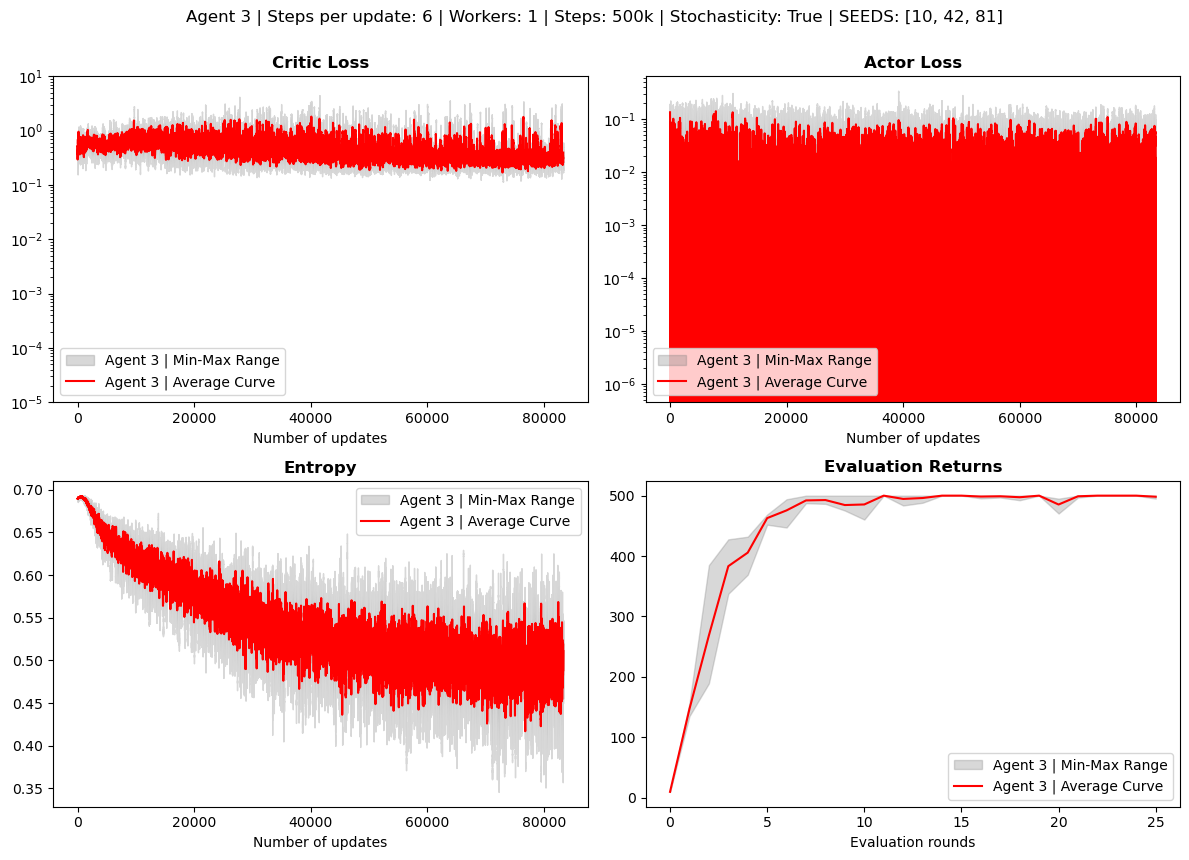

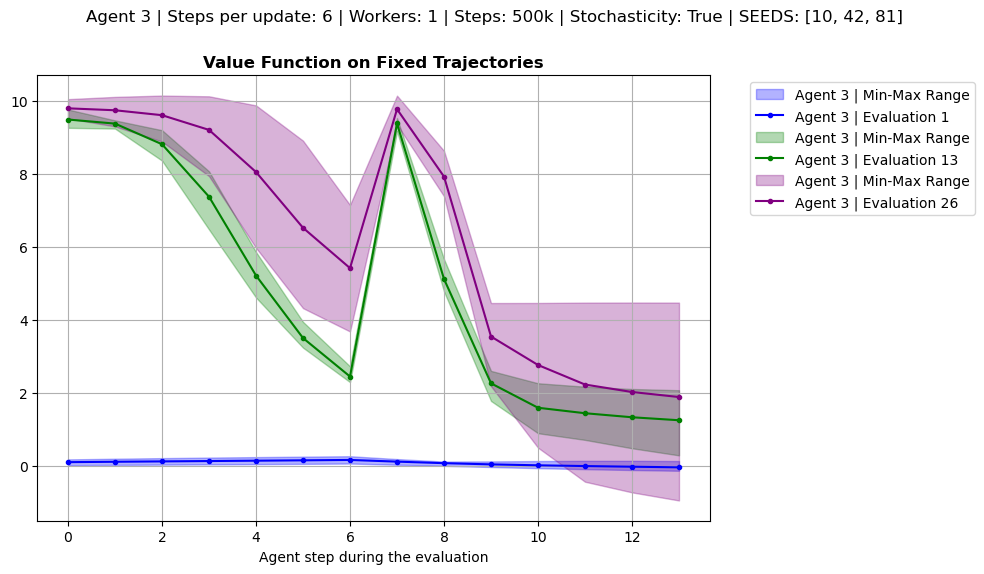

In [16]:
# Define the directory path
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_3, actor_losses_3, train_returns_idx_3, training_returns_3, evaluation_returns_seeds_3, agents_seeds, id_agent, n_steps_per_update_3, n_envs_3, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_3} | Workers: {n_envs_3} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_3, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_3} | Workers: {n_envs_3} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

### AGENT 4 (K = 6 | n = 6)

#### HYPERPARAMETERS SETUP

In [17]:
id_agent = "4" # ID of the Agent for the report [1:6]
n_envs_4 = 6
envs = []
for i in range(n_envs_4):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_4 = 6
n_updates = n_steps // (n_steps_per_update_4*n_envs_4)
evaluation_interval = 20000//(n_steps_per_update_4*n_envs_4) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
logging_interval = 1000//(n_steps_per_update_4 * n_envs_4)
stochasticity_bool = True
#agents_data_discrete = load_agents_data("agents_data_discrete.npz") # Load the data of the previous agents

#### TRAIN AGENT

In [18]:
# Logging training variables
values_4, critic_losses_4, actor_losses_4, entropies_4, evaluation_returns_seeds_4, training_returns_4, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_4, n_steps_per_update_4, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)

train_returns_idx_4 = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_discrete.update(create_agent_data('agent_4', values_4, critic_losses_4, actor_losses_4, entropies_4, evaluation_returns_seeds_4, agents_seeds, n_steps, stochasticity_bool, n_envs_4, n_steps_per_update_4, train_returns_idx_4, training_returns_4))
save_agents_data(agents_data_discrete, 'agents_data_discrete.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 8/13889 [00:00<03:00, 76.88it/s]

EVALUATION


  4%|▍         | 566/13889 [00:06<02:25, 91.84it/s]

EVALUATION


  8%|▊         | 1126/13889 [00:12<02:18, 92.02it/s]

EVALUATION


 12%|█▏        | 1676/13889 [00:17<02:14, 90.58it/s]

EVALUATION


 16%|█▌        | 2236/13889 [00:23<02:14, 86.87it/s]

EVALUATION


 20%|██        | 2784/13889 [00:30<02:15, 81.79it/s]

EVALUATION


 24%|██▍       | 3342/13889 [00:36<02:08, 81.84it/s]

EVALUATION


 28%|██▊       | 3879/13889 [00:42<01:54, 87.50it/s]

EVALUATION


 32%|███▏      | 4446/13889 [00:48<02:22, 66.18it/s]

EVALUATION


 36%|███▌      | 4995/13889 [00:54<01:35, 93.29it/s]

EVALUATION


 40%|███▉      | 5545/13889 [01:00<01:32, 89.95it/s]

EVALUATION


 44%|████▍     | 6112/13889 [01:07<01:45, 73.44it/s]

EVALUATION


 48%|████▊     | 6670/13889 [01:13<01:39, 72.79it/s]

EVALUATION


 52%|█████▏    | 7224/13889 [01:20<01:31, 73.17it/s]

EVALUATION


 56%|█████▌    | 7778/13889 [01:26<01:30, 67.58it/s]

EVALUATION


 60%|█████▉    | 8317/13889 [01:32<01:00, 91.90it/s]

EVALUATION


 64%|██████▍   | 8877/13889 [01:38<00:52, 94.92it/s]

EVALUATION


 68%|██████▊   | 9437/13889 [01:44<01:08, 64.96it/s]

EVALUATION


 72%|███████▏  | 9987/13889 [01:50<00:41, 94.74it/s]

EVALUATION


 76%|███████▌  | 10547/13889 [01:56<00:47, 69.79it/s]

EVALUATION


 80%|███████▉  | 11097/13889 [02:02<00:29, 95.49it/s]

EVALUATION


 84%|████████▍ | 11647/13889 [02:08<00:23, 93.47it/s]

EVALUATION


 88%|████████▊ | 12207/13889 [02:14<00:18, 93.34it/s]

EVALUATION


 92%|█████████▏| 12757/13889 [02:20<00:11, 95.97it/s]

EVALUATION


 96%|█████████▌| 13318/13889 [02:26<00:06, 90.77it/s]

EVALUATION


100%|█████████▉| 13875/13889 [02:33<00:00, 84.16it/s]

EVALUATION


100%|██████████| 13889/13889 [02:34<00:00, 90.09it/s]


Running seed 42 for agent 1


  0%|          | 9/13889 [00:00<02:49, 81.96it/s]

EVALUATION


  4%|▍         | 567/13889 [00:06<02:26, 90.83it/s]

EVALUATION


  8%|▊         | 1118/13889 [00:12<02:29, 85.55it/s]

EVALUATION


 12%|█▏        | 1670/13889 [00:18<02:37, 77.47it/s]

EVALUATION


 16%|█▌        | 2225/13889 [00:24<02:46, 70.14it/s]

EVALUATION


 20%|██        | 2779/13889 [00:30<02:34, 71.80it/s]

EVALUATION


 24%|██▍       | 3327/13889 [00:36<01:52, 94.13it/s]

EVALUATION


 28%|██▊       | 3881/13889 [00:42<01:54, 87.35it/s]

EVALUATION


 32%|███▏      | 4436/13889 [00:49<01:43, 91.46it/s]

EVALUATION


 36%|███▌      | 4996/13889 [00:55<02:13, 66.67it/s]

EVALUATION


 40%|███▉      | 5553/13889 [01:02<02:06, 65.84it/s]

EVALUATION


 44%|████▍     | 6104/13889 [01:08<01:27, 89.27it/s]

EVALUATION


 48%|████▊     | 6660/13889 [01:15<01:27, 82.44it/s]

EVALUATION


 52%|█████▏    | 7217/13889 [01:21<01:42, 64.84it/s]

EVALUATION


 56%|█████▌    | 7765/13889 [01:27<01:08, 89.18it/s]

EVALUATION


 60%|██████    | 8335/13889 [01:34<01:17, 71.99it/s]

EVALUATION


 64%|██████▍   | 8877/13889 [01:40<00:54, 91.64it/s]

EVALUATION


 68%|██████▊   | 9437/13889 [01:47<01:13, 60.86it/s]

EVALUATION


 72%|███████▏  | 9987/13889 [01:52<00:41, 93.06it/s]

EVALUATION


 76%|███████▌  | 10546/13889 [01:59<00:53, 62.84it/s]

EVALUATION


 80%|███████▉  | 11095/13889 [02:05<00:30, 92.51it/s]

EVALUATION


 84%|████████▍ | 11654/13889 [02:11<00:23, 93.47it/s]

EVALUATION


 88%|████████▊ | 12204/13889 [02:17<00:18, 93.39it/s]

EVALUATION


 92%|█████████▏| 12764/13889 [02:23<00:12, 93.42it/s]

EVALUATION


 96%|█████████▌| 13314/13889 [02:29<00:06, 92.84it/s]

EVALUATION


100%|█████████▉| 13874/13889 [02:36<00:00, 92.99it/s]

EVALUATION


100%|██████████| 13889/13889 [02:36<00:00, 88.79it/s]


Running seed 81 for agent 2


  0%|          | 9/13889 [00:00<02:46, 83.23it/s]

EVALUATION


  4%|▍         | 568/13889 [00:06<02:25, 91.73it/s]

EVALUATION


  8%|▊         | 1128/13889 [00:12<02:19, 91.33it/s]

EVALUATION


 12%|█▏        | 1678/13889 [00:18<02:15, 90.00it/s]

EVALUATION


 16%|█▌        | 2228/13889 [00:24<02:30, 77.48it/s]

EVALUATION


 20%|██        | 2778/13889 [00:30<02:34, 71.72it/s]

EVALUATION


 24%|██▍       | 3327/13889 [00:36<01:53, 93.15it/s]

EVALUATION


 28%|██▊       | 3887/13889 [00:42<02:11, 75.90it/s]

EVALUATION


 32%|███▏      | 4447/13889 [00:48<01:58, 79.47it/s]

EVALUATION


 36%|███▌      | 5007/13889 [00:54<01:47, 82.82it/s]

EVALUATION


 40%|████      | 5557/13889 [01:00<01:49, 76.30it/s]

EVALUATION


 44%|████▍     | 6106/13889 [01:06<01:58, 65.54it/s]

EVALUATION


 48%|████▊     | 6666/13889 [01:12<01:37, 74.37it/s]

EVALUATION


 52%|█████▏    | 7216/13889 [01:18<01:31, 72.86it/s]

EVALUATION


 56%|█████▌    | 7776/13889 [01:24<01:26, 70.62it/s]

EVALUATION


 60%|██████    | 8335/13889 [01:30<01:13, 75.72it/s]

EVALUATION


 64%|██████▍   | 8885/13889 [01:36<01:06, 75.46it/s]

EVALUATION


 68%|██████▊   | 9435/13889 [01:42<00:47, 93.81it/s]

EVALUATION


 72%|███████▏  | 9994/13889 [01:48<00:59, 65.68it/s]

EVALUATION


 76%|███████▌  | 10554/13889 [01:54<00:46, 71.93it/s]

EVALUATION


 80%|███████▉  | 11104/13889 [02:01<00:42, 65.82it/s]

EVALUATION


 84%|████████▍ | 11654/13889 [02:06<00:23, 93.81it/s]

EVALUATION


 88%|████████▊ | 12214/13889 [02:13<00:24, 67.43it/s]

EVALUATION


 92%|█████████▏| 12763/13889 [02:19<00:12, 93.40it/s]

EVALUATION


 96%|█████████▌| 13321/13889 [02:25<00:08, 64.34it/s]

EVALUATION


100%|█████████▉| 13879/13889 [02:31<00:00, 63.52it/s]

EVALUATION


100%|██████████| 13889/13889 [02:32<00:00, 91.35it/s]


#### PLOTTING

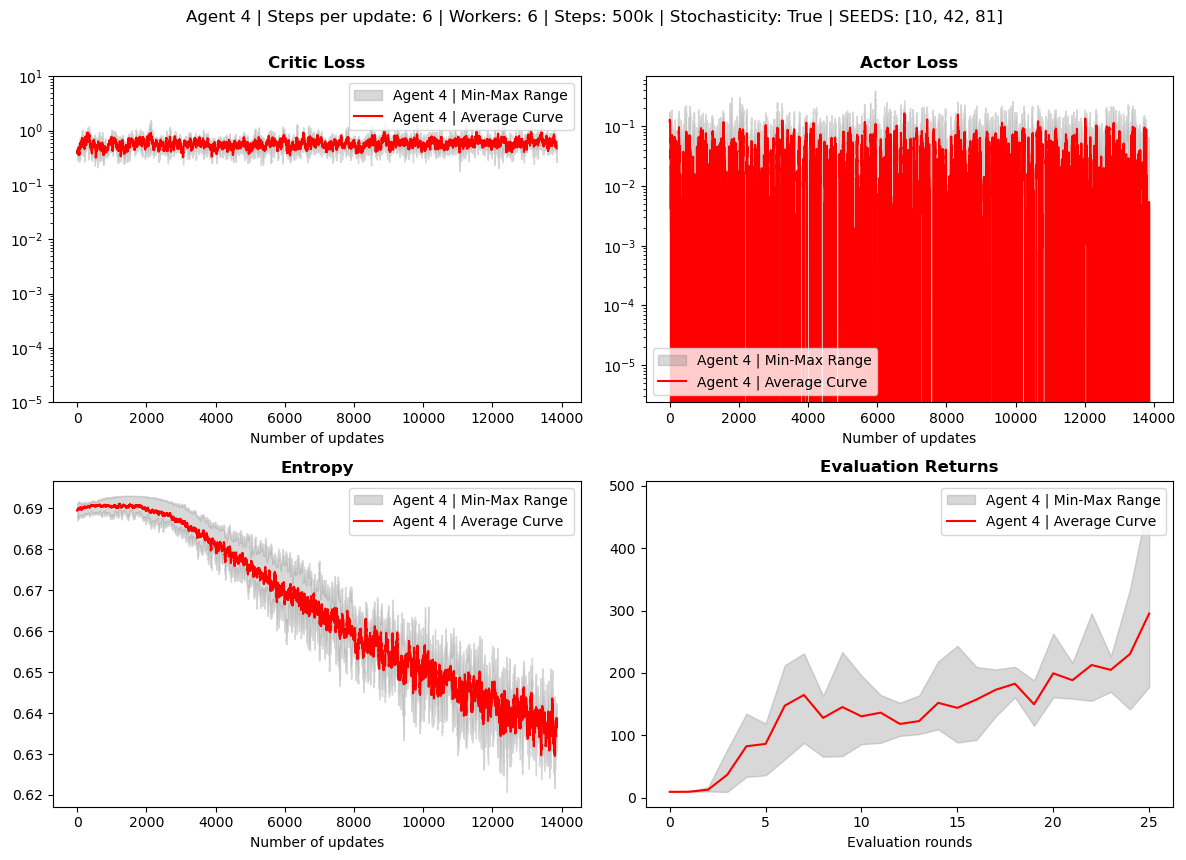

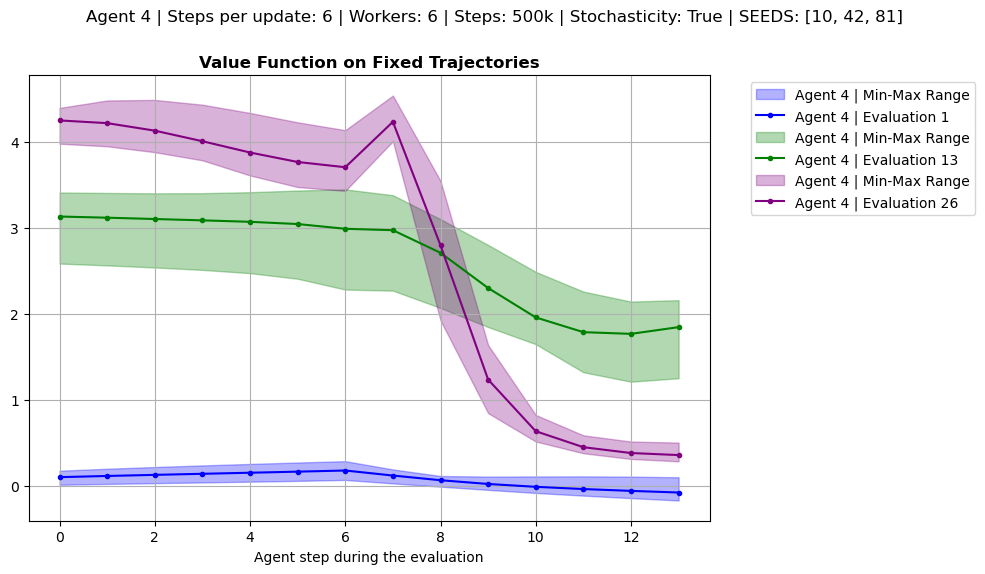

In [19]:
# Define the directory path
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_4, actor_losses_4, train_returns_idx_4, training_returns_4, evaluation_returns_seeds_4, agents_seeds, id_agent, n_steps_per_update_4, n_envs_4, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_4} | Workers: {n_envs_4} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_4, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_4} | Workers: {n_envs_4} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

# Comparisons


In [49]:
# Selecting the agents to compare
agent_a = 'agent_3'
agent_b = 'agent_4'
#agent_c = 'agent_1b'

# Load the agents data through the correct dictionnary (either agents_data or loaded_agents_data)
dictionnary = load_agents_data("agents_data_discrete.npz")

agent_data_a = dictionnary[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']
agent_data_b = dictionnary[agent_b]; critic_b, actor_b, entrop_b, eval_return_b, values_b, agents_seeds_b, n_steps_b, stochasticity_bool_b, n_envs_b, n_steps_per_update_b, id_b, train_return_idx_b, train_returns_b = agent_data_b['critic_losses'], agent_data_b['actor_losses'], agent_data_b['entropies'], agent_data_b['evaluation_returns_seeds'], agent_data_b['values'], agent_data_b['agents_seeds'], agent_data_b['n_steps'], agent_data_b['stochasticity_bool'], agent_data_b['n_envs'], agent_data_b['n_steps_per_update'], agent_data_b['id'], agent_data_b['train_returns_idx'], agent_data_b['train_returns']
#agent_data_c = dictionnary[agent_c]; critic_c, actor_c, entrop_c, eval_return_c, values_c, agents_seeds_c, n_steps_c, stochasticity_bool_c, n_envs_c, n_steps_per_update_c, id_c = agent_data_c['critic_losses'], agent_data_c['actor_losses'], agent_data_c['entropies'], agent_data_c['evaluation_returns_seeds'], agent_data_c['values'], agent_data_c['agents_seeds'], agent_data_c['n_steps'], agent_data_c['stochasticity_bool'], agent_data_c['n_envs'], agent_data_c['n_steps_per_update'], agent_data_c['id']

## Losses, Entropy and Return comparison

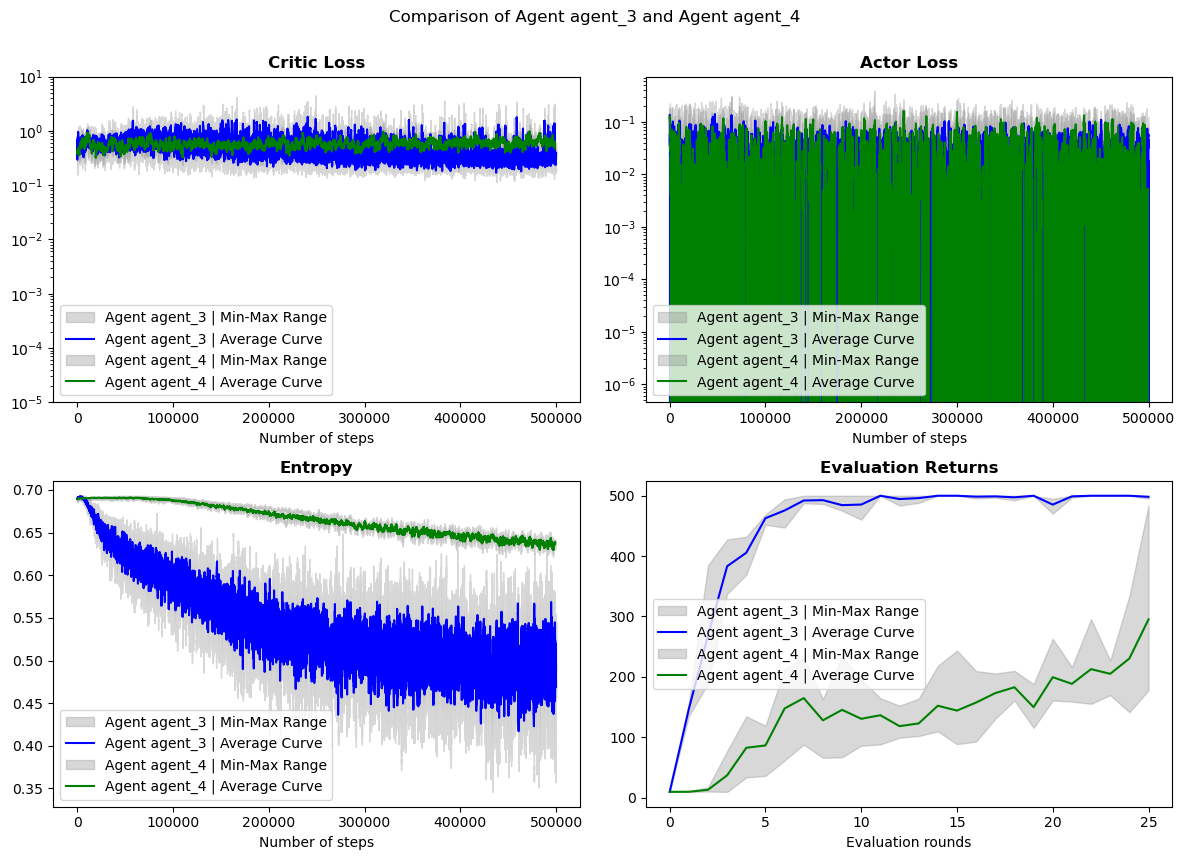

In [51]:
# Define the directory path
directory = f'figures/Comparisons'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)
    
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

colors = ['blue', 'green', 'purple', 'orange', 'black', 'yellow', 'pink', 'brown', 'cyan', 'magenta']
compare_bool = True
y_lim_losses = [1e-5, 1e1]

plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_a, actor_a, train_return_idx_a, train_returns_a, eval_return_a, agents_seeds, id_a, n_steps_per_update_a, n_envs_a, colors[0], y_lim = y_lim_losses)
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_b, actor_b, train_return_idx_b, train_returns_b eval_return_b, agents_seeds, id_b, n_steps_per_update_b, n_envs_b, colors[1], y_lim = y_lim_losses)
#plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_c, actor_c, entrop_c, eval_return_c, agents_seeds, id_agent, n_steps_per_update_c, n_envs_c, colors[2], ylim = y_lim_losses)

plt.suptitle(f"Comparison of Agent {id_a} and Agent {id_b}", x=0.5, fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Losses&Returns_Agents_{id_a}_vs_{id_b}.png'), bbox_inches='tight')
plt.show()

## Trajectories comparison

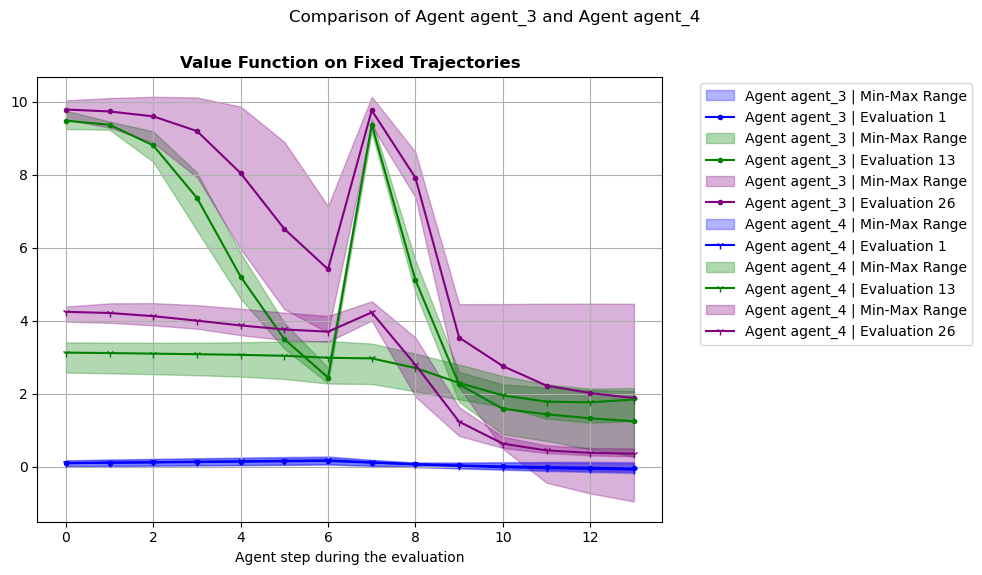

In [32]:
plt.figure(figsize=(10, 6))
marker_styles = [".", "1", '^', 'x', '+']
n_traj = 3 

# Stacking plots
plot_trajectories(plt, values_a,agents_seeds_a, id_a, marker_styles[0], n_traj)
plot_trajectories(plt, values_b,agents_seeds_b, id_b, marker_styles[1], n_traj)
#plot_trajectories(plot, values_c,agents_seeds_c, id_c, marker_styles[2], n_traj)

# Plotting esthetics
plt.suptitle(f"Comparison of Agent {id_a} and Agent {id_b}", x=0.5, fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Trajectories_Agents_{id_a}_vs_{id_b}.png'), bbox_inches='tight')
plt.show()

## CONTINUOUS CASE 5-6

In [33]:
# use CartPole for the discrete case
environment = "InvertedPendulum-v4"
env_eval = gym.make(environment)
obs_shape = env_eval.observation_space.shape[0]
action_space_dims = 1 ## Continuous case ==> 1 dimension of action space: continuous force between [-3, 3] Newton
bool_discrete = False
agents_data_continuous = {}  # Creating the dictionary to store the data of the agents 5->6

### AGENT 5 (K = 1 | n = 1)

#### HYPERPARAMETERS SETUP

In [34]:
id_agent = "5" # ID of the Agent for the report [1:6]
n_envs_5 = 1
envs = []
for i in range(n_envs_5):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_5 = 1
n_updates = n_steps // (n_steps_per_update_5*n_envs_5)
evaluation_interval = 20000//(n_steps_per_update_5*n_envs_5) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
logging_interval = 1000//(n_steps_per_update_5 * n_envs_5)
stochasticity_bool = True

#### TRAIN AGENT

In [37]:
# Logging training variables
values_5, critic_losses_5, actor_losses_5, entropies_5, evaluation_returns_seeds_5, training_returns_5, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_5, n_steps_per_update_5, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)

train_returns_idx_5 = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_continuous.update(create_agent_data('agent_5', values_5, critic_losses_5, actor_losses_5, entropies_5, evaluation_returns_seeds_5, agents_seeds, n_steps, stochasticity_bool, n_envs_5, n_steps_per_update_5, train_returns_idx_5, training_returns_5))
save_agents_data(agents_data_continuous, 'agents_data_continuous.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 102/500001 [00:00<08:13, 1013.33it/s]

EVALUATION


  4%|▍         | 19961/500001 [00:16<06:31, 1227.04it/s]

EVALUATION


  8%|▊         | 39956/500001 [00:32<06:08, 1247.95it/s]

EVALUATION


 12%|█▏        | 60005/500001 [00:49<08:08, 900.03it/s] 

EVALUATION


 16%|█▌        | 79891/500001 [01:05<05:56, 1178.95it/s]

EVALUATION


 20%|█▉        | 99994/500001 [01:22<05:14, 1271.92it/s]

EVALUATION


 24%|██▍       | 119886/500001 [01:40<04:58, 1274.77it/s]

EVALUATION


 28%|██▊       | 139944/500001 [01:56<04:43, 1269.76it/s]

EVALUATION


 32%|███▏      | 159947/500001 [02:13<04:29, 1261.63it/s]

EVALUATION


 36%|███▌      | 179965/500001 [02:30<04:48, 1107.51it/s]

EVALUATION


 40%|███▉      | 199895/500001 [02:47<04:29, 1112.01it/s]

EVALUATION


 44%|████▍     | 219939/500001 [03:04<03:40, 1269.60it/s]

EVALUATION


 48%|████▊     | 239987/500001 [03:21<03:20, 1294.26it/s]

EVALUATION


 52%|█████▏    | 259984/500001 [03:37<03:41, 1085.73it/s]

EVALUATION


 56%|█████▌    | 279970/500001 [03:52<02:39, 1380.32it/s]

EVALUATION


 60%|█████▉    | 299945/500001 [04:08<02:30, 1327.83it/s]

EVALUATION


 64%|██████▍   | 319935/500001 [04:23<02:13, 1350.45it/s]

EVALUATION


 68%|██████▊   | 339877/500001 [04:39<01:57, 1361.80it/s]

EVALUATION


 72%|███████▏  | 359983/500001 [04:55<01:42, 1372.49it/s]

EVALUATION


 76%|███████▌  | 379971/500001 [05:11<01:27, 1378.11it/s]

EVALUATION


 80%|███████▉  | 399906/500001 [05:26<01:12, 1372.06it/s]

EVALUATION


 84%|████████▍ | 419909/500001 [05:42<00:58, 1371.44it/s]

EVALUATION


 88%|████████▊ | 439875/500001 [05:57<00:43, 1375.63it/s]

EVALUATION


 92%|█████████▏| 459992/500001 [06:13<00:28, 1380.65it/s]

EVALUATION


 96%|█████████▌| 479994/500001 [06:30<00:14, 1334.41it/s]

EVALUATION


100%|█████████▉| 499891/500001 [06:46<00:00, 1370.80it/s]

EVALUATION


100%|██████████| 500001/500001 [06:47<00:00, 1227.56it/s]


Running seed 42 for agent 1


  0%|          | 96/500001 [00:00<08:40, 959.73it/s]

EVALUATION


  4%|▍         | 20132/500001 [00:15<07:16, 1100.57it/s]

EVALUATION


  8%|▊         | 39904/500001 [00:30<05:45, 1330.52it/s]

EVALUATION


 12%|█▏        | 59991/500001 [00:46<05:34, 1313.53it/s]

EVALUATION


 16%|█▌        | 79983/500001 [01:03<05:19, 1315.31it/s]

EVALUATION


 20%|█▉        | 99908/500001 [01:19<05:08, 1297.01it/s]

EVALUATION


 24%|██▍       | 119917/500001 [01:34<04:49, 1310.97it/s]

EVALUATION


 28%|██▊       | 139884/500001 [01:50<04:24, 1363.10it/s]

EVALUATION


 32%|███▏      | 159928/500001 [02:07<04:22, 1296.21it/s]

EVALUATION


 36%|███▌      | 179886/500001 [02:23<03:57, 1345.73it/s]

EVALUATION


 40%|███▉      | 199898/500001 [02:39<03:55, 1276.63it/s]

EVALUATION


 44%|████▍     | 219984/500001 [02:55<03:34, 1305.03it/s]

EVALUATION


 48%|████▊     | 239955/500001 [03:11<03:13, 1343.14it/s]

EVALUATION


 52%|█████▏    | 259868/500001 [03:27<02:57, 1352.00it/s]

EVALUATION


 56%|█████▌    | 279916/500001 [03:43<02:42, 1356.29it/s]

EVALUATION


 60%|█████▉    | 299877/500001 [03:59<02:39, 1252.83it/s]

EVALUATION


 64%|██████▍   | 319874/500001 [04:16<02:11, 1372.00it/s]

EVALUATION


 68%|██████▊   | 339993/500001 [04:32<02:00, 1331.82it/s]

EVALUATION


 72%|███████▏  | 359923/500001 [04:48<01:52, 1241.19it/s]

EVALUATION


 76%|███████▌  | 379905/500001 [05:05<01:44, 1145.39it/s]

EVALUATION


 80%|███████▉  | 399971/500001 [05:21<01:17, 1283.14it/s]

EVALUATION


 84%|████████▍ | 419879/500001 [05:37<01:00, 1313.53it/s]

EVALUATION


 88%|████████▊ | 439999/500001 [05:53<00:48, 1239.33it/s]

EVALUATION


 92%|█████████▏| 459951/500001 [06:09<00:30, 1309.13it/s]

EVALUATION


 96%|█████████▌| 479987/500001 [06:25<00:15, 1312.06it/s]

EVALUATION


100%|█████████▉| 499956/500001 [06:42<00:00, 1400.23it/s]

EVALUATION


100%|██████████| 500001/500001 [06:43<00:00, 1239.48it/s]


Running seed 81 for agent 2


  0%|          | 123/500001 [00:00<06:47, 1225.39it/s]

EVALUATION


  4%|▍         | 20117/500001 [00:14<06:54, 1156.57it/s]

EVALUATION


  8%|▊         | 39936/500001 [00:30<05:30, 1392.43it/s]

EVALUATION


 12%|█▏        | 59938/500001 [00:45<05:25, 1351.26it/s]

EVALUATION


 16%|█▌        | 79963/500001 [01:01<05:02, 1386.89it/s]

EVALUATION


 20%|█▉        | 99987/500001 [01:17<04:48, 1386.64it/s]

EVALUATION


 24%|██▍       | 119911/500001 [01:32<04:55, 1284.17it/s]

EVALUATION


 28%|██▊       | 139907/500001 [01:48<04:30, 1332.43it/s]

EVALUATION


 32%|███▏      | 159966/500001 [02:04<04:02, 1399.63it/s]

EVALUATION


 36%|███▌      | 179991/500001 [02:19<03:48, 1401.65it/s]

EVALUATION


 40%|███▉      | 199869/500001 [02:35<03:38, 1371.56it/s]

EVALUATION


 44%|████▍     | 219911/500001 [02:51<03:21, 1392.12it/s]

EVALUATION


 48%|████▊     | 239935/500001 [03:07<03:14, 1340.38it/s]

EVALUATION


 52%|█████▏    | 259945/500001 [03:23<02:56, 1359.31it/s]

EVALUATION


 56%|█████▌    | 279940/500001 [03:39<02:41, 1363.96it/s]

EVALUATION


 60%|█████▉    | 299962/500001 [03:55<02:30, 1329.37it/s]

EVALUATION


 64%|██████▍   | 319937/500001 [04:11<02:09, 1385.16it/s]

EVALUATION


 68%|██████▊   | 339920/500001 [04:28<02:00, 1333.28it/s]

EVALUATION


 72%|███████▏  | 359921/500001 [04:44<01:44, 1334.43it/s]

EVALUATION


 76%|███████▌  | 379899/500001 [04:59<01:34, 1270.79it/s]

EVALUATION


 80%|███████▉  | 399949/500001 [05:16<01:20, 1238.24it/s]

EVALUATION


 84%|████████▍ | 419931/500001 [05:32<00:57, 1389.83it/s]

EVALUATION


 88%|████████▊ | 439867/500001 [05:48<00:43, 1378.38it/s]

EVALUATION


 92%|█████████▏| 459981/500001 [06:03<00:30, 1305.02it/s]

EVALUATION


 96%|█████████▌| 479872/500001 [06:19<00:14, 1376.88it/s]

EVALUATION


100%|█████████▉| 499980/500001 [06:36<00:00, 1286.09it/s]

EVALUATION


100%|██████████| 500001/500001 [06:37<00:00, 1259.40it/s]


#### PLOTTING

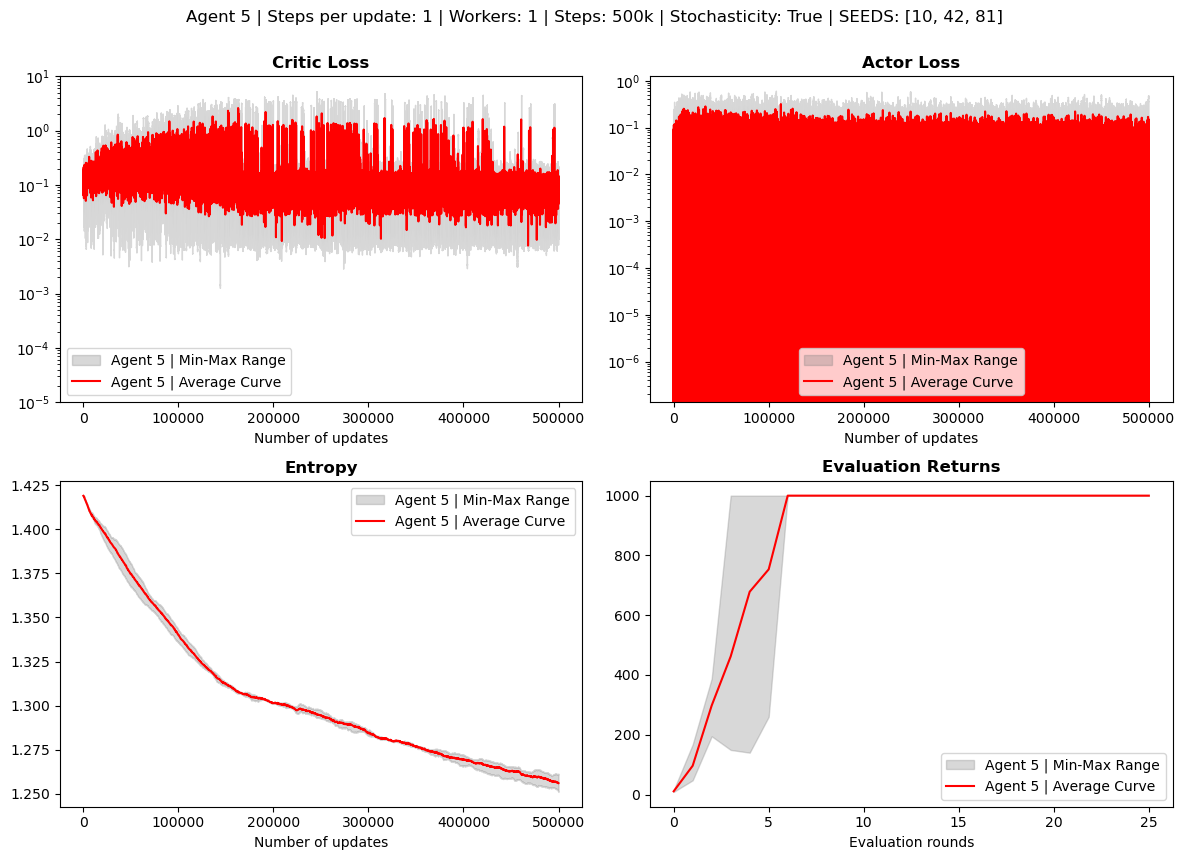

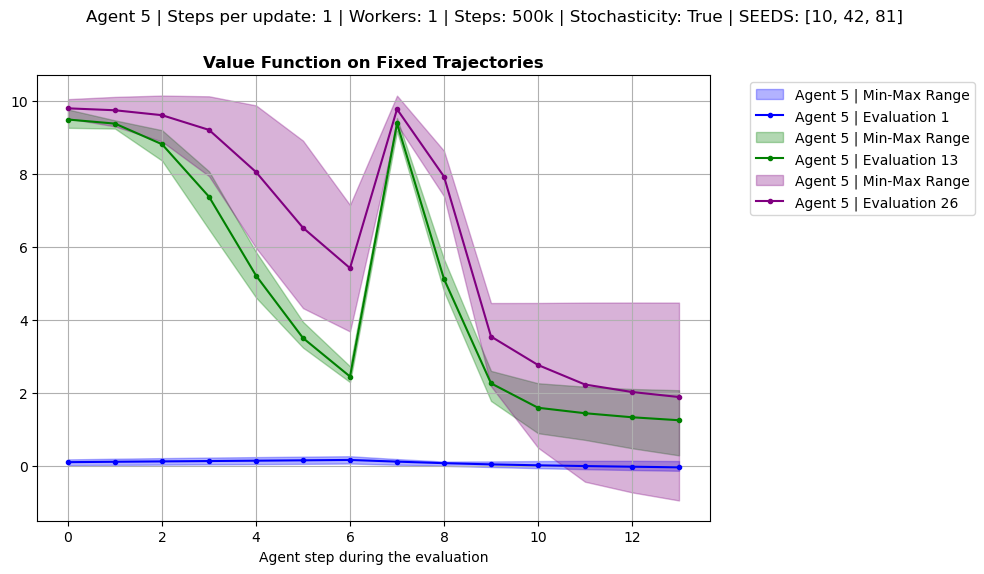

In [38]:
# Define the directory path
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_5, actor_losses_5, train_returns_idx_5, training_returns_5, evaluation_returns_seeds_5, agents_seeds, id_agent, n_steps_per_update_5, n_envs_5, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_5} | Workers: {n_envs_5} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_3, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_5} | Workers: {n_envs_5} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

### AGENT 6 (K = 6 | n = 6)

#### HYPERPARAMETERS SETUP

In [39]:
id_agent = "6" # ID of the Agent for the report [1:6]
n_envs_6 = 6
envs = []
for i in range(n_envs_6):
    env = gym.make(environment)
    envs.append(env)

n_steps_per_update_6 = 6
n_updates = n_steps // (n_steps_per_update_6*n_envs_6)
evaluation_interval = 20000//(n_steps_per_update_6*n_envs_6) # evaluate the agent every 20k steps
n_evaluations = n_updates // evaluation_interval
stochasticity_bool = True
logging_interval = 1000//(n_steps_per_update_6 * n_envs_6)
actor_lr = 3e-4
#agents_data_continuous = load_agents_data("agents_data_continuous.npz") # Load the data of the previous agents

#### TRAIN AGENT

In [40]:
# Logging training variables
values_6, critic_losses_6, actor_losses_6, entropies_6, evaluation_returns_seeds_6, training_returns_6, training_returns_idx = trainAgent(n_steps, agents_seeds,n_seeds,envs,env_eval,n_updates,bool_discrete,obs_shape,action_space_dims,device,critic_lr, actor_lr, n_envs_6, n_steps_per_update_6, evaluation_interval, logging_interval, n_eval_runs,stochasticity_bool,stochastic_reward_probability,gamma)

train_returns_idx_6 = aggregate_return_seeds(training_returns_idx) # Aggregate the returns of the training over the 3 seeds

agents_data_continuous.update(create_agent_data('agent_6', values_6, critic_losses_6, actor_losses_6, entropies_6, evaluation_returns_seeds_6, agents_seeds, n_steps, stochasticity_bool, n_envs_6, n_steps_per_update_6, train_returns_idx_6, training_returns_6))
save_agents_data(agents_data_continuous, 'agents_data_continuous.npz') # Saving the data of the agents

Running seed 10 for agent 0


  0%|          | 8/13889 [00:00<03:00, 76.71it/s]

EVALUATION


  4%|▍         | 563/13889 [00:06<02:38, 84.13it/s]

EVALUATION


  8%|▊         | 1122/13889 [00:12<02:46, 76.86it/s]

EVALUATION


 12%|█▏        | 1667/13889 [00:19<03:32, 57.39it/s]

EVALUATION


 16%|█▌        | 2227/13889 [00:25<02:31, 76.74it/s]

EVALUATION


 20%|█▉        | 2776/13889 [00:31<02:33, 72.40it/s]

EVALUATION


 24%|██▍       | 3341/13889 [00:37<02:18, 76.09it/s]

EVALUATION


 28%|██▊       | 3893/13889 [00:43<02:31, 66.02it/s]

EVALUATION


 32%|███▏      | 4440/13889 [00:50<01:42, 92.37it/s]

EVALUATION


 36%|███▌      | 4989/13889 [00:56<01:47, 83.09it/s]

EVALUATION


 40%|███▉      | 5552/13889 [01:03<02:15, 61.31it/s]

EVALUATION


 44%|████▍     | 6112/13889 [01:09<01:32, 84.34it/s]

EVALUATION


 48%|████▊     | 6660/13889 [01:15<01:20, 90.09it/s]

EVALUATION


 52%|█████▏    | 7218/13889 [01:21<01:34, 70.79it/s]

EVALUATION


 56%|█████▌    | 7767/13889 [01:27<01:08, 89.25it/s]

EVALUATION


 60%|█████▉    | 8317/13889 [01:34<00:58, 94.70it/s]

EVALUATION


 64%|██████▍   | 8880/13889 [01:42<01:03, 78.83it/s]

EVALUATION


 68%|██████▊   | 9429/13889 [01:49<00:53, 83.97it/s]

EVALUATION


 72%|███████▏  | 9990/13889 [01:56<00:43, 90.65it/s]

EVALUATION


 76%|███████▌  | 10539/13889 [02:02<00:35, 93.33it/s]

EVALUATION


 80%|███████▉  | 11103/13889 [02:10<00:44, 62.43it/s]

EVALUATION


 84%|████████▍ | 11649/13889 [02:16<00:24, 90.98it/s]

EVALUATION


 88%|████████▊ | 12210/13889 [02:23<00:18, 92.82it/s]

EVALUATION


 92%|█████████▏| 12761/13889 [02:30<00:12, 86.80it/s]

EVALUATION


 96%|█████████▌| 13319/13889 [02:37<00:06, 93.85it/s]

EVALUATION


100%|█████████▉| 13875/13889 [02:44<00:00, 95.88it/s]

EVALUATION


100%|██████████| 13889/13889 [02:45<00:00, 84.04it/s]


Running seed 42 for agent 1


  0%|          | 9/13889 [00:00<02:46, 83.54it/s]

EVALUATION


  4%|▍         | 570/13889 [00:06<02:43, 81.55it/s]

EVALUATION


  8%|▊         | 1118/13889 [00:12<02:29, 85.47it/s]

EVALUATION


 12%|█▏        | 1677/13889 [00:18<02:33, 79.72it/s]

EVALUATION


 16%|█▌        | 2211/13889 [00:24<02:05, 93.26it/s]

EVALUATION


 20%|██        | 2788/13889 [00:31<02:11, 84.49it/s]

EVALUATION


 24%|██▍       | 3332/13889 [00:37<02:39, 66.36it/s]

EVALUATION


 28%|██▊       | 3887/13889 [00:43<02:19, 71.93it/s]

EVALUATION


 32%|███▏      | 4446/13889 [00:49<02:20, 67.06it/s]

EVALUATION


 36%|███▌      | 4998/13889 [00:55<02:08, 69.29it/s]

EVALUATION


 40%|███▉      | 5549/13889 [01:02<01:38, 84.57it/s]

EVALUATION


 44%|████▍     | 6099/13889 [01:08<01:39, 78.67it/s]

EVALUATION


 48%|████▊     | 6652/13889 [01:15<01:22, 87.28it/s]

EVALUATION


 52%|█████▏    | 7212/13889 [01:23<01:18, 84.60it/s]

EVALUATION


 56%|█████▌    | 7765/13889 [01:30<01:05, 93.06it/s]

EVALUATION


 60%|█████▉    | 8317/13889 [01:36<01:03, 87.65it/s]

EVALUATION


 64%|██████▍   | 8873/13889 [01:43<00:52, 95.04it/s]

EVALUATION


 68%|██████▊   | 9432/13889 [01:51<00:49, 89.21it/s]

EVALUATION


 72%|███████▏  | 9981/13889 [01:58<00:42, 92.25it/s]

EVALUATION


 76%|███████▌  | 10537/13889 [02:04<00:35, 95.14it/s]

EVALUATION


 80%|███████▉  | 11092/13889 [02:11<00:31, 89.96it/s]

EVALUATION


 84%|████████▍ | 11649/13889 [02:18<00:24, 90.70it/s]

EVALUATION


 88%|████████▊ | 12204/13889 [02:25<00:20, 83.53it/s]

EVALUATION


 92%|█████████▏| 12760/13889 [02:32<00:11, 95.03it/s]

EVALUATION


 96%|█████████▌| 13316/13889 [02:39<00:06, 91.71it/s]

EVALUATION


100%|█████████▉| 13875/13889 [02:46<00:00, 96.30it/s]

EVALUATION


100%|██████████| 13889/13889 [02:47<00:00, 83.09it/s]


Running seed 81 for agent 2


  0%|          | 9/13889 [00:00<02:42, 85.24it/s]

EVALUATION


  4%|▍         | 568/13889 [00:06<02:41, 82.37it/s]

EVALUATION


  8%|▊         | 1124/13889 [00:12<02:28, 86.04it/s]

EVALUATION


 12%|█▏        | 1671/13889 [00:19<02:33, 79.44it/s]

EVALUATION


 16%|█▌        | 2226/13889 [00:25<02:47, 69.61it/s]

EVALUATION


 20%|██        | 2783/13889 [00:32<02:29, 74.18it/s]

EVALUATION


 24%|██▍       | 3337/13889 [00:38<02:18, 75.92it/s]

EVALUATION


 28%|██▊       | 3878/13889 [00:44<01:50, 90.33it/s]

EVALUATION


 32%|███▏      | 4448/13889 [00:51<01:54, 82.38it/s]

EVALUATION


 36%|███▌      | 4998/13889 [00:57<02:19, 63.63it/s]

EVALUATION


 40%|███▉      | 5547/13889 [01:03<01:28, 94.54it/s]

EVALUATION


 44%|████▍     | 6115/13889 [01:09<01:34, 82.41it/s]

EVALUATION


 48%|████▊     | 6655/13889 [01:15<01:17, 93.14it/s]

EVALUATION


 52%|█████▏    | 7215/13889 [01:21<01:10, 94.11it/s]

EVALUATION


 56%|█████▌    | 7764/13889 [01:28<01:04, 94.39it/s]

EVALUATION


 60%|█████▉    | 8324/13889 [01:35<00:58, 94.52it/s]

EVALUATION


 64%|██████▍   | 8873/13889 [01:42<01:00, 83.30it/s]

EVALUATION


 68%|██████▊   | 9426/13889 [01:49<00:49, 89.36it/s]

EVALUATION


 72%|███████▏  | 9983/13889 [01:56<00:40, 95.76it/s]

EVALUATION


 76%|███████▌  | 10553/13889 [02:03<00:41, 80.22it/s]

EVALUATION


 80%|███████▉  | 11093/13889 [02:09<00:29, 96.26it/s]

EVALUATION


 84%|████████▍ | 11653/13889 [02:15<00:23, 96.14it/s]

EVALUATION


 88%|████████▊ | 12203/13889 [02:22<00:17, 96.19it/s]

EVALUATION


 92%|█████████▏| 12763/13889 [02:28<00:11, 97.15it/s]

EVALUATION


 96%|█████████▌| 13320/13889 [02:35<00:06, 91.30it/s]

EVALUATION


100%|█████████▉| 13874/13889 [02:42<00:00, 92.77it/s]

EVALUATION


100%|██████████| 13889/13889 [02:43<00:00, 84.74it/s]


#### PLOTTING

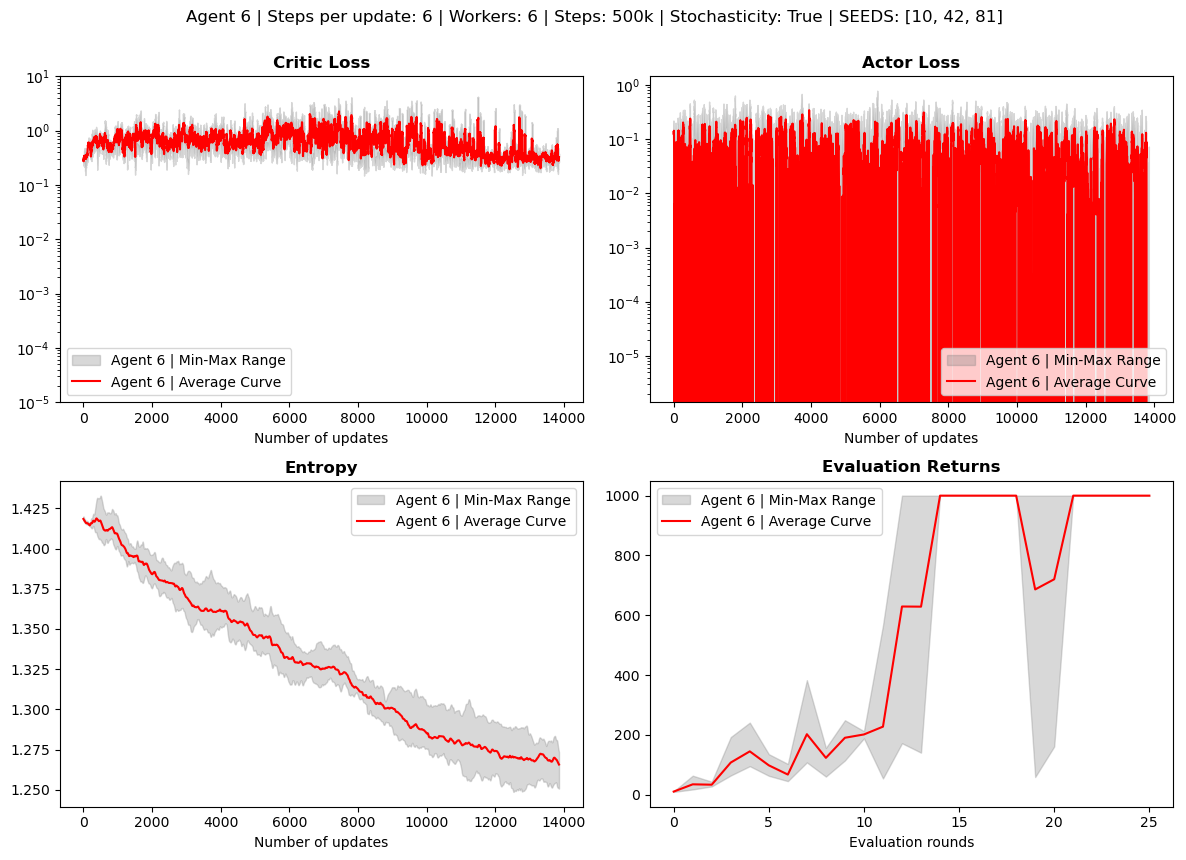

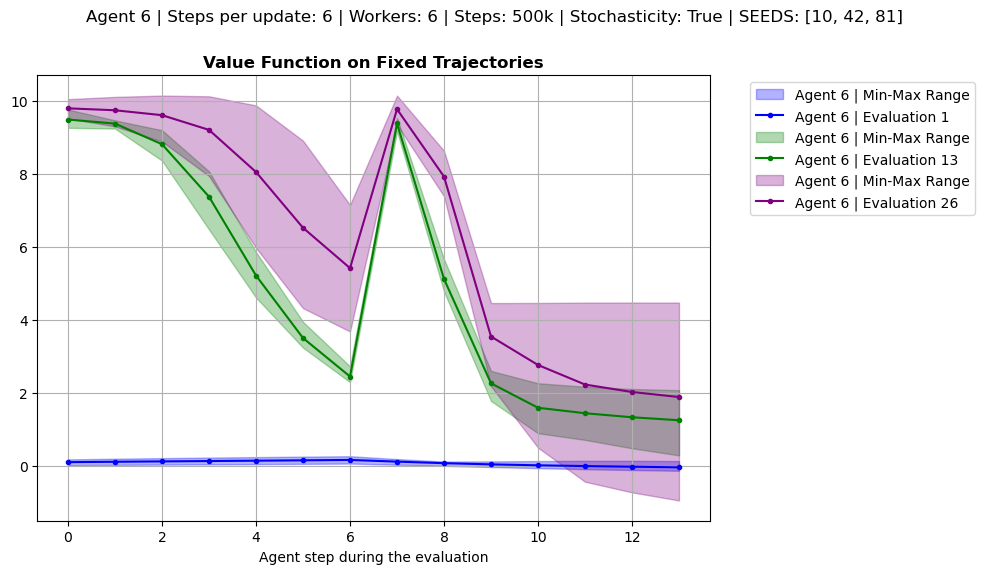

In [41]:
# Define the directory path
directory = f'figures/Agent_{id_agent}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot the losses and returns
fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
compare_bool = False
y_lim_losses = [1e-5, 1e1]
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_losses_6, actor_losses_6, train_returns_idx_6, training_returns_6, evaluation_returns_seeds_6, agents_seeds, id_agent, n_steps_per_update_6, n_envs_6, color_agent = 'red', y_lim = y_lim_losses)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_6} | Workers: {n_envs_6} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Losses&Returns.png'), bbox_inches='tight')
plt.show()

# Plot the value function trajectories
marker_styles = [".", "1", '^', 'x', '+']
plt.figure(figsize=(10, 6))
plot_trajectories(plt, values_3, agents_seeds, id_agent, marker_styles[0], n_traj = 3)

plt.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update_6} | Workers: {n_envs_6} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, 'Trajectories.png'), bbox_inches='tight')
plt.show()

# Comparisons


In [42]:
# Selecting the agents to compare
agent_a = 'agent_5'
agent_b = 'agent_6'
#agent_c = 'agent_1b'

# Load the agents data through the correct dictionnary (either agents_data or loaded_agents_data)
dictionnary = load_agents_data("agents_data_continuous.npz")
agent_data_a = dictionnary[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']
agent_data_b = dictionnary[agent_b]; critic_b, actor_b, entrop_b, eval_return_b, values_b, agents_seeds_b, n_steps_b, stochasticity_bool_b, n_envs_b, n_steps_per_update_b, id_b, train_return_idx_b, train_returns_b = agent_data_b['critic_losses'], agent_data_b['actor_losses'], agent_data_b['entropies'], agent_data_b['evaluation_returns_seeds'], agent_data_b['values'], agent_data_b['agents_seeds'], agent_data_b['n_steps'], agent_data_b['stochasticity_bool'], agent_data_b['n_envs'], agent_data_b['n_steps_per_update'], agent_data_b['id'], agent_data_b['train_returns_idx'], agent_data_b['train_returns']
#agent_data_c = dictionnary[agent_c]; critic_c, actor_c, entrop_c, eval_return_c, values_c, agents_seeds_c, n_steps_c, stochasticity_bool_c, n_envs_c, n_steps_per_update_c, id_c = agent_data_c['critic_losses'], agent_data_c['actor_losses'], agent_data_c['entropies'], agent_data_c['evaluation_returns_seeds'], agent_data_c['values'], agent_data_c['agents_seeds'], agent_data_c['n_steps'], agent_data_c['stochasticity_bool'], agent_data_c['n_envs'], agent_data_c['n_steps_per_update'], agent_data_c['id']

## Losses, Entropy and Return comparison

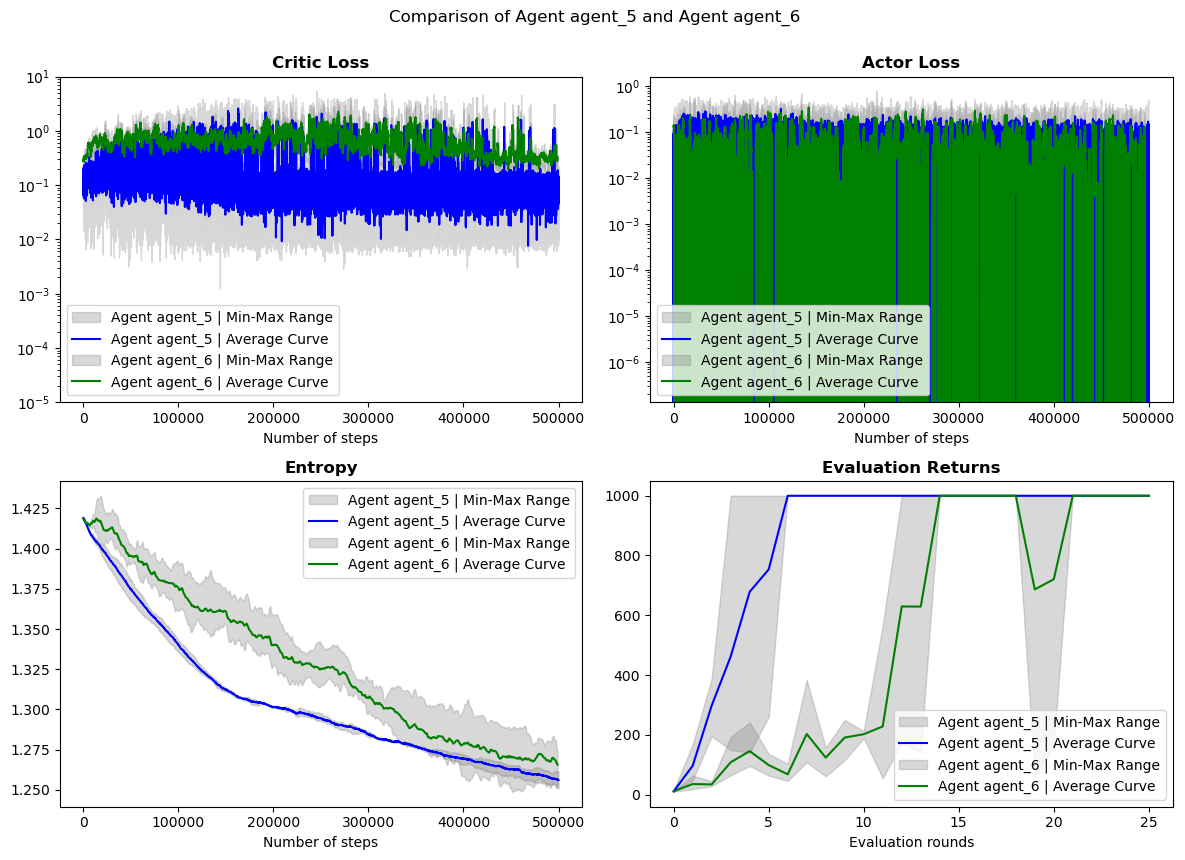

In [47]:
# Define the directory path
directory = f'figures/Comparisons'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

fig_in, axs_in = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

colors = ['blue', 'green', 'purple', 'orange', 'black', 'yellow', 'pink', 'brown', 'cyan', 'magenta']
compare_bool = True
y_lim_losses = [1e-5, 1e1]

plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_a, actor_a, train_return_idx_a, train_returns_a, eval_return_a, agents_seeds, id_a, n_steps_per_update_a, n_envs_a, colors[0], y_lim = y_lim_losses)
plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_b, actor_b, train_return_idx_b, train_returns_b, eval_return_b, agents_seeds, id_b, n_steps_per_update_b, n_envs_b, colors[1], y_lim = y_lim_losses)
#plot_losses_and_returns(fig_in, axs_in, compare_bool, critic_c, actor_c, entrop_c, eval_return_c, agents_seeds, id_agent, n_steps_per_update_c, n_envs_c, colors[2], ylim = y_lim_losses)

plt.suptitle(f"Comparison of Agent {id_a} and Agent {id_b}", x=0.5, fontsize=12)
#fig.suptitle(f"Agent {id_agent} | Steps per update: {n_steps_per_update} | Workers: {n_envs} | Steps: {n_steps//1000}k | Stochasticity: {stochasticity_bool} | SEEDS: {agents_seeds}", x=0.5, fontsize = 12)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Losses&Returns_Agents_{id_a}_vs_{id_b}.png'), bbox_inches='tight')
plt.show()

## Trajectories comparison

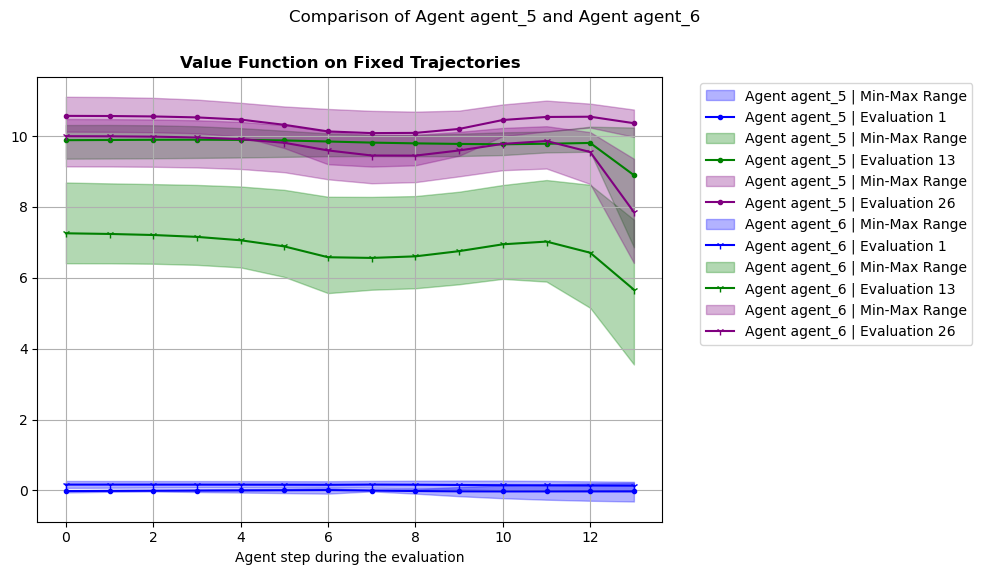

In [48]:
plt.figure(figsize=(10, 6))
marker_styles = [".", "1", '^', 'x', '+']
n_traj = 3 

# Stacking plots
plot_trajectories(plt, values_a,agents_seeds_a, id_a, marker_styles[0], n_traj)
plot_trajectories(plt, values_b,agents_seeds_b, id_b, marker_styles[1], n_traj)
#plot_trajectories(plot, values_c,agents_seeds_c, id_c, marker_styles[2], n_traj)

# Plotting esthetics
plt.suptitle(f"Comparison of Agent {id_a} and Agent {id_b}", x=0.5, fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Trajectories_Agents_{id_a}_vs_{id_b}.png'), bbox_inches='tight')
plt.show()